# Project Problem Statement

### Problem Statement

The context of the problem, revolves around AllLife Bank's interest in expanding its customer base for personal loans. The bank has a large number of liability customers (depositors) but relatively few asset customers (borrowers). To enhance its loan business and increase revenue from interest, the bank aims to convert more of its liability customers into personal loan customers while maintaining them as depositors.

The context is further enriched by a prior marketing campaign conducted by the bank, which managed to achieve a conversion rate of over 9% by targeting liability customers. This success motivates the bank's retail marketing department to develop more effective campaigns by understanding customer attributes that significantly influence loan purchases. The ultimate goal is to improve the targeting strategy to achieve a higher success rate in converting liability customers to personal loan customers.

### Objective

The objective of the project is to predict whether a liability customer of AllLife Bank will purchase a personal loan. Additionally, the project aims to understand which customer attributes are most significant in driving these loan purchases and to identify customer segments that should be targeted more effectively in marketing campaigns.

### Dataset

* **ID**: Customer’s unique identifier.

* **Age**: Customer’s age in completed years.

* **Experience**: Number of years of professional experience.

* **Income**: Annual income of the customer in thousand dollars.

* **ZIP Code**: Home address ZIP code of the customer.

* **Family**: Family size of the customer.

* **CCAvg**: Average spending on credit cards per month in thousand dollars.

* **Education**: Education level of the customer categorized as:

  1. Undergrad

  2. Graduate

  3. Advanced/Professional

* **Mortgage**: Value of house mortgage in thousand dollars, if any.

* **Personal_Loan**: Binary indicator of whether the customer accepted the personal loan offer in the last campaign (1: Yes, 0: No).

* **Securities_Account**: Binary indicator of whether the customer has a securities account with the bank (1: Yes, 0: No).

* **CD_Account**: Binary indicator of whether the customer has a certificate of deposit (CD) account with the bank (1: Yes, 0: No).

* **Online**: Binary indicator of whether the customer uses internet banking facilities (1: Yes, 0: No).

* **CreditCard**: Binary indicator of whether the customer uses a credit card issued by any other bank, excluding AllLife Bank (1: Yes, 0: No).

# Importing the necessary libraries

In [1]:
# Importing and manipulating data
import pandas as pd
import numpy as np

# Visualiztion Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

# Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Projects/Module2-MachineLearning/Loan_Modelling.csv")

In [4]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

# Data Overview

In [5]:
# Viewing the 1st 5 rows of the dataset
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [6]:
# Viewing the last 5 rows of the dataset
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [7]:
# checking the number of rows and the number of column
df.shape

(5000, 14)

In [8]:
# checking the datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observation**

1. All variables expect CCAvg(float64) are int64.
2. All the variables have 5000 non null values.

In [9]:
# Checking null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Observation**

There are no null values in the data for any column.

In [10]:
# Checking duplicate values
df.duplicated().sum()

np.int64(0)

**Observation**

There are no duplicate values present in the data.

In [11]:
# finding unique values in ID column

df['ID'].nunique()

5000

In [12]:
# Dropping Id Column as it will not be used for analysis
df.drop(['ID'], axis=1, inplace=True)

In [13]:
# Statistical Summary of dataset
df.describe()

Age   Experience       Income       ZIPCode       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200  93169.257000     2.396400   
std      11.463166    11.467954    46.033729   1759.455086     1.147663   
min      23.000000    -3.000000     8.000000  90005.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean      1.937938     1.881000    56.498800       0.096000   
std       1.747659     0.839869   101.713802       0.294621   
min       0.000000     1.000000     0.000000       0.000000   
25%       0.700000     1.000000     0.000000       0.000000   
50%       1.500000     2.000000     0.000000       0.000000   
75%       2.500000     3.000000   101.000000       0.000000   
max      10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

**Observations**

1. Columns like CreditCard, ZipCode, Education, CD_Account, Personal Loan, Securities_Account, CD_Account dont provide much information as there interpretation is of categorical columns.

2. Experience - Min Value  is -3 which seems to be an error and average experience is 20 Years.

3. Age - Min Age 23, Max Age - 67 and Mean Age - 45

4. Income - Min 8,000, Max - 224,000 and Mean - 73,000

5. Family - Average - 2 , 50% of the data hace 2 family members

6. CC_Avg - Mean Spend is around 2300 dollars and 50% of the data spend 1500 dollars

7. Mortgage - Mean mortgage is 5600 dollars. 50% of the data doesnt have mortgage

# Replacing Negative Experience values with median value

In [14]:
# Getting the rows where experience is less than 0
df[df['Experience'] < 0]['Experience']

89     -1
226    -1
315    -2
451    -2
524    -1
536    -1
540    -1
576    -1
583    -1
597    -2
649    -1
670    -1
686    -1
793    -2
889    -2
909    -1
1173   -1
1428   -1
1522   -1
1905   -1
2102   -1
2430   -1
2466   -2
2545   -1
2618   -3
2717   -2
2848   -1
2876   -2
2962   -2
2980   -1
3076   -1
3130   -2
3157   -1
3279   -1
3284   -1
3292   -1
3394   -1
3425   -1
3626   -3
3796   -2
3824   -1
3887   -2
3946   -1
4015   -1
4088   -1
4116   -2
4285   -3
4411   -2
4481   -2
4514   -3
4582   -1
4957   -1
Name: Experience, dtype: int64

In [15]:
# Counting the no of negative values

df[df['Experience'] < 0].shape[0]

52

In [16]:
# Replacing Experience negative values with median of positive values

medianExperience = df[df['Experience'] > 0]['Experience'].median()
print(medianExperience)

21.0


In [17]:
# Replaceing Negative values with Median of all positive numbers
df['Experience'] = df['Experience'].apply(lambda x: medianExperience if x < 0 else x)

In [18]:
#Checking if all negative values are gone

df[df['Experience'] < 0].shape[0]

0

# EDA Analysis

## Common Functions

In [19]:
def histogram_boxplot(data, feature, figsize=(12, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [21]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [22]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

#### Observation on Age

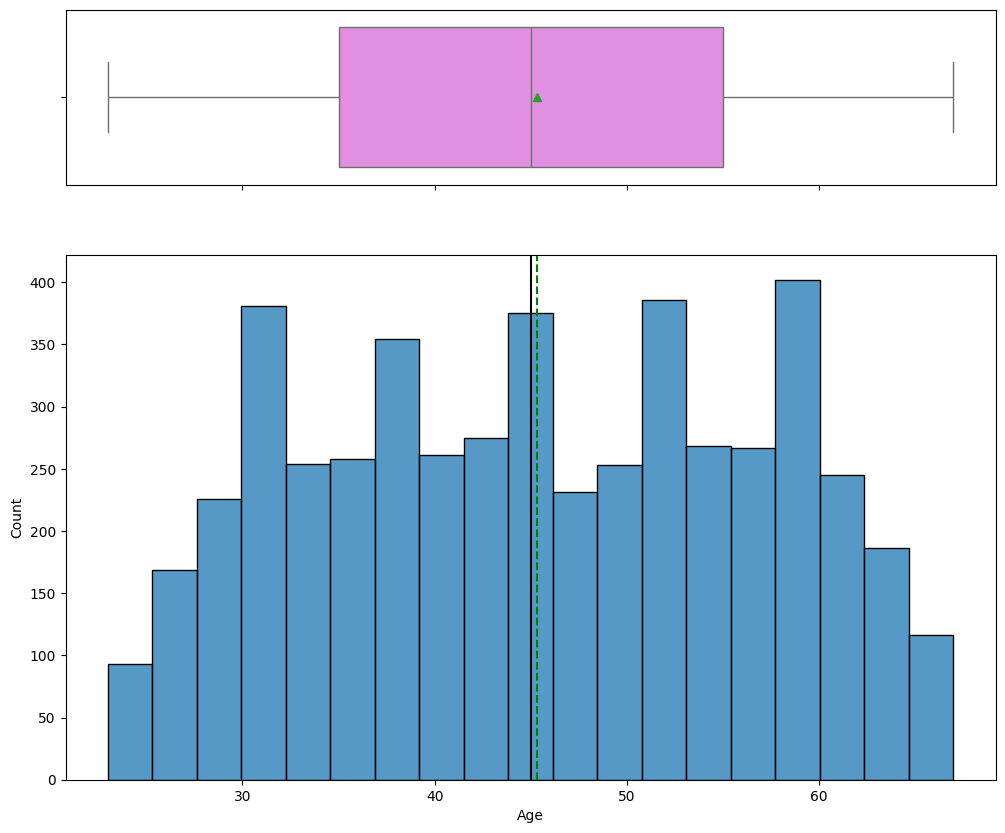

In [23]:
histogram_boxplot(df, 'Age')

**Observation**

1. Age seems to be normally distributed.
2. The maximum peak comes at around Age 58-60.
3. No outliers.

#### Observation on Experience

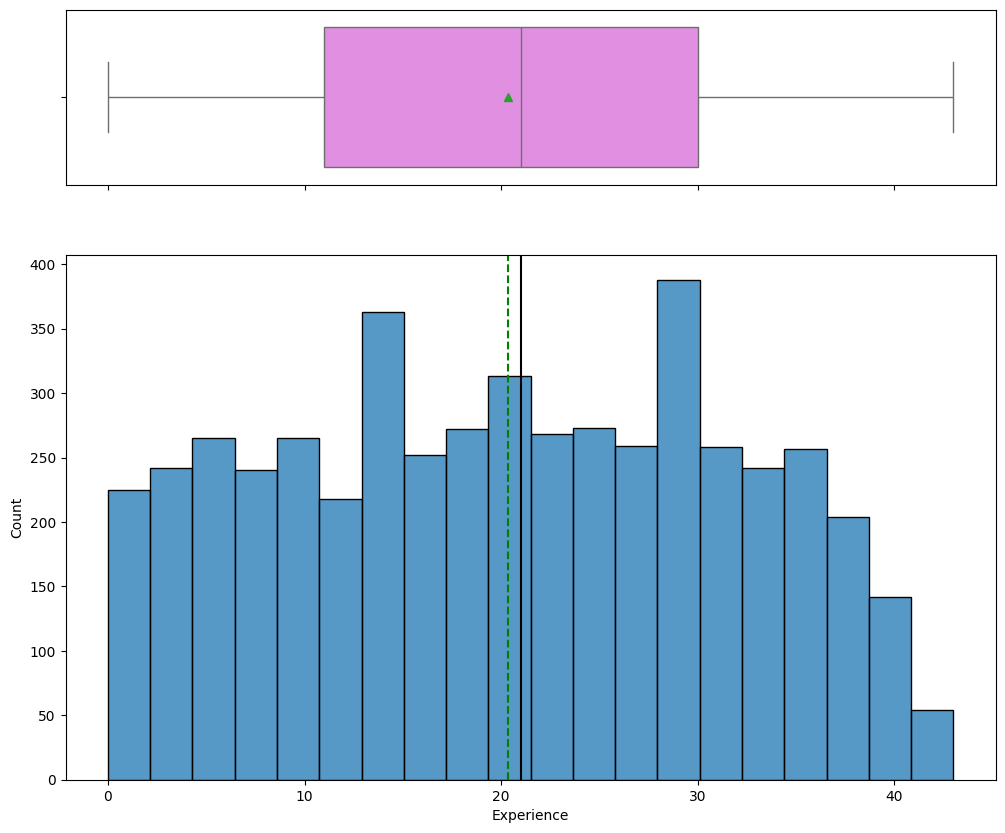

In [24]:
histogram_boxplot(df, 'Experience')

**Observation**

1. No outliers.
2. Peak comes at around 28-30 years of experience.

#### Observation on Income

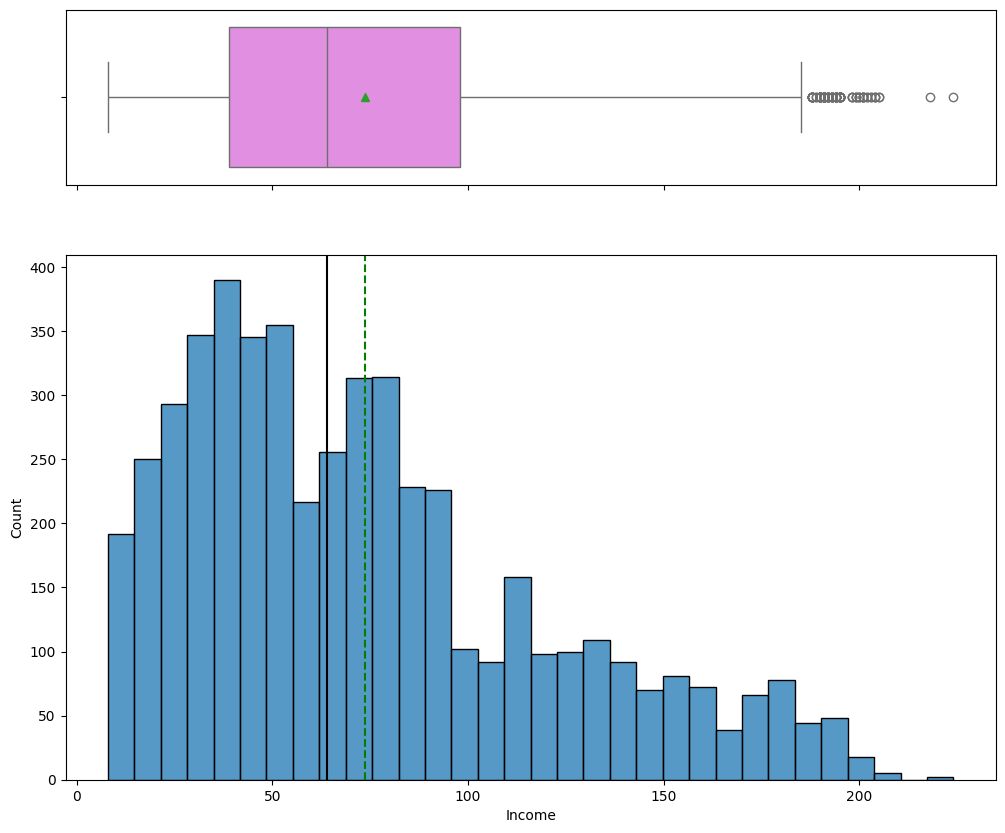

In [25]:
histogram_boxplot(df,'Income')

**Observation**

1. Data looks to be right skewed.
2. There are outliers detected from the boxplot.

#### Observation on Zipcode

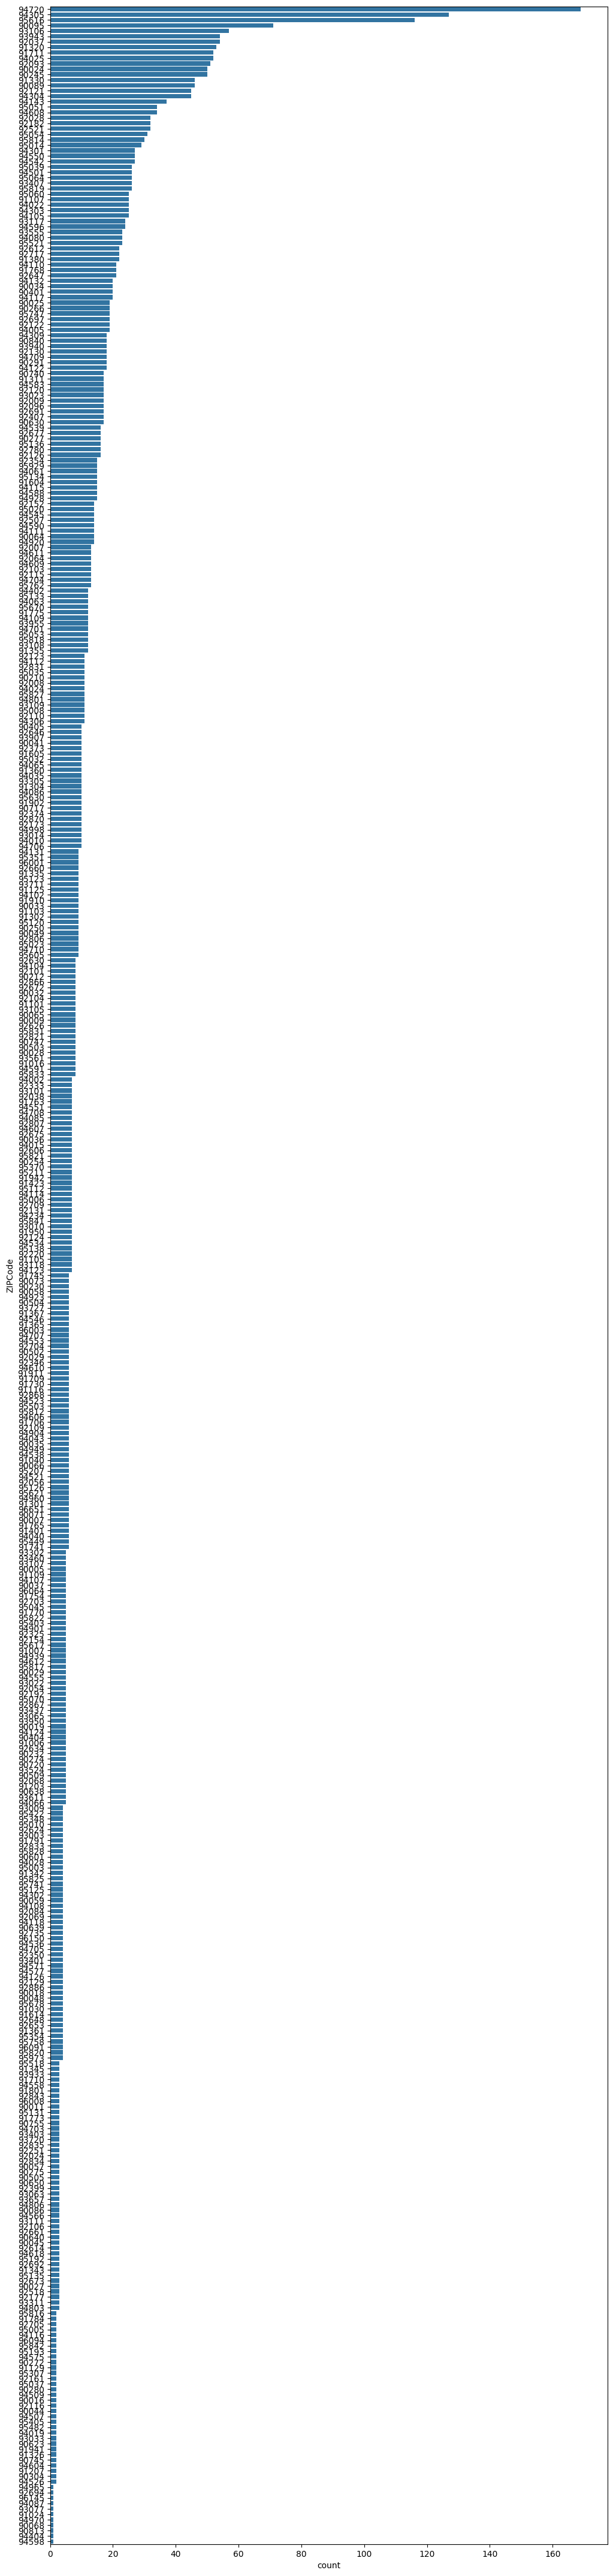

In [26]:
plt.figure(figsize=(12,55))
ax = sns.countplot(data=df, y='ZIPCode', order = data['ZIPCode'].value_counts().index)

**Observation**

1. Top 5 zipcode are
94720,
94305,
95616,
90095,
93106

#### Observation on Family

<ipython-input-20-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


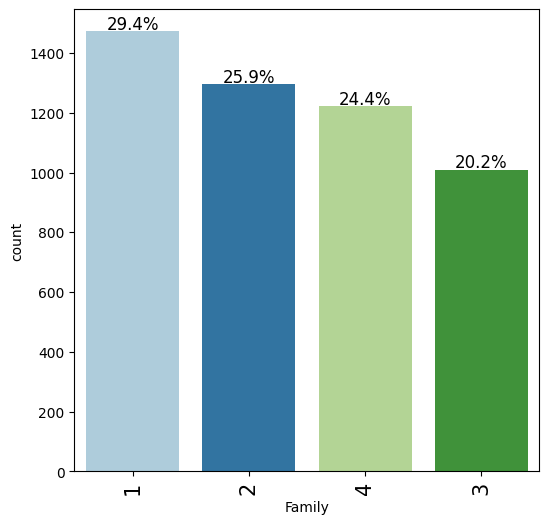

In [27]:
labeled_barplot(data, "Family", perc=True)

**Observation**

1. The majority of Family is of size 1 with 29.4%

#### Observation on CCAvg

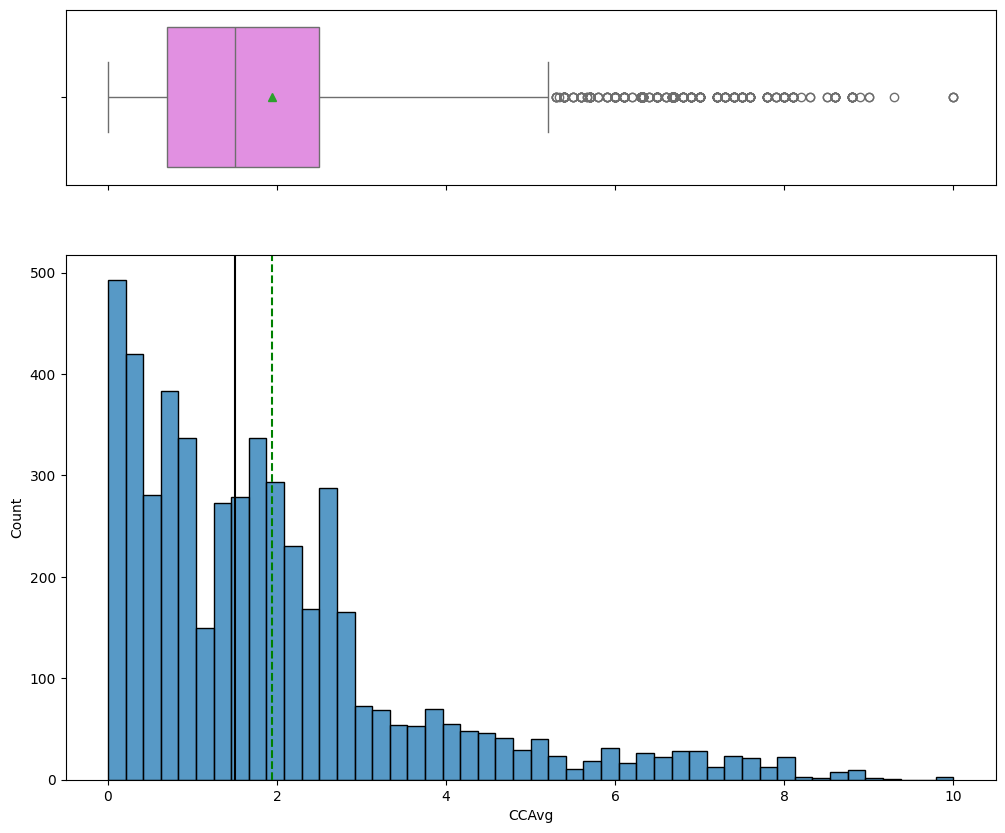

In [28]:
histogram_boxplot(df, 'CCAvg')

**Observation**

1. Data is right skewed.
2. There are many outliers present in the data.

#### Observation on Education

<ipython-input-20-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


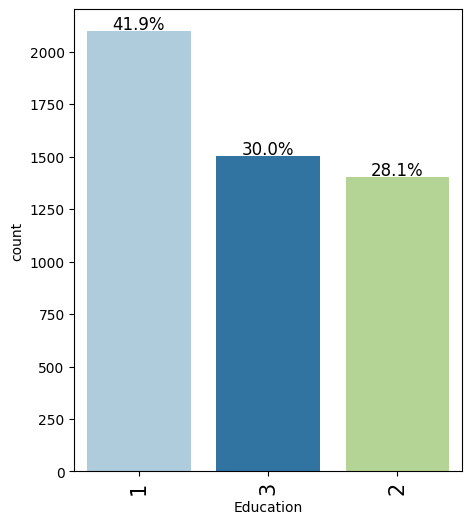

In [29]:
labeled_barplot(data, "Education", perc=True)

**Observation**

41.9% of customers Undergrad
28.1% of customers Graduate
30.0% of customers Advanced/Professional

#### Observation on Mortgage

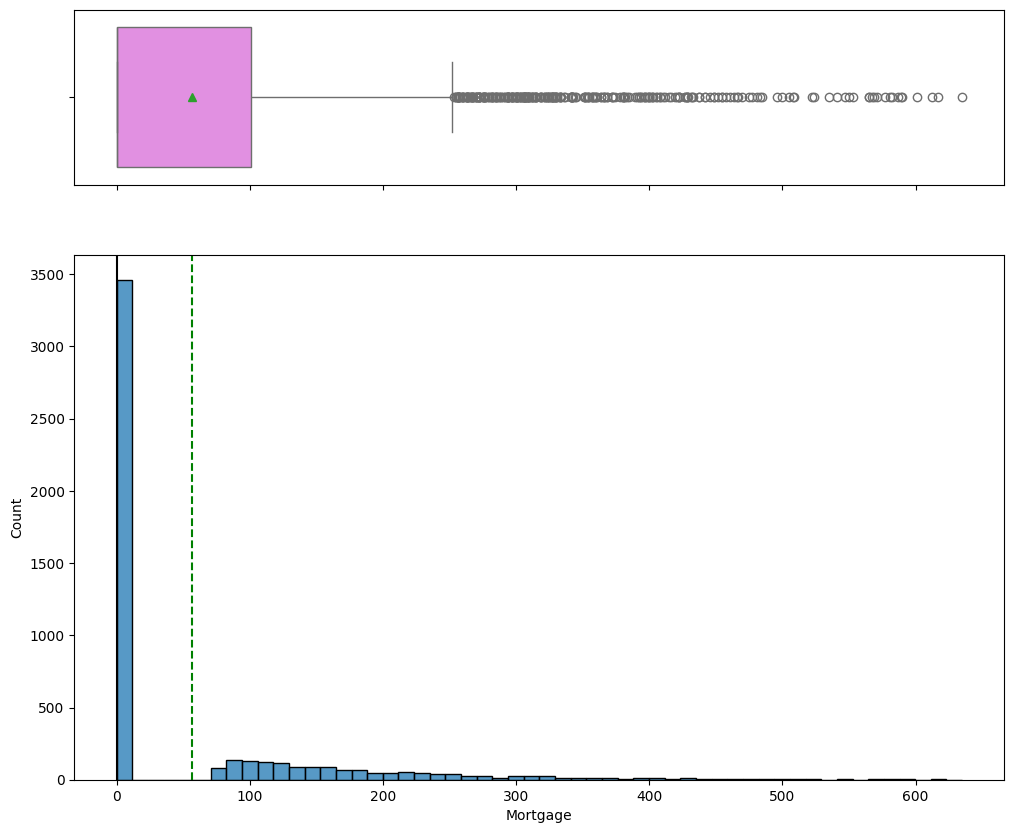

In [30]:
histogram_boxplot(df,'Mortgage')

**Observation**

1. Since the min value of mortage is 0 so the data is heavily right skewed.

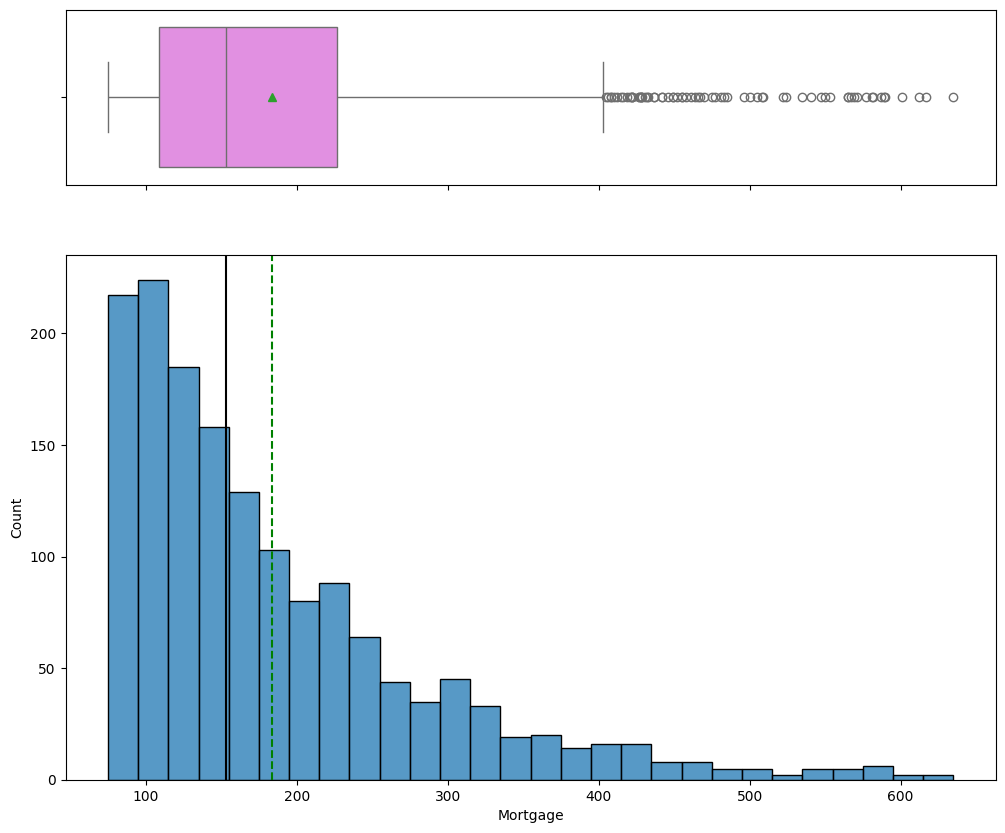

In [31]:
# removing the mortgage value 0

histogram_boxplot(df[df['Mortgage'] > 0],'Mortgage')

**Observation**

1. Data is again right skewed even after removing the min mortgage value.

#### Observation on Personal Loan

<ipython-input-20-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


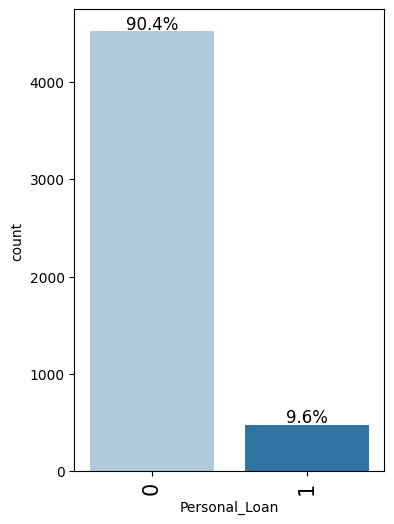

In [32]:
labeled_barplot(df,'Personal_Loan',perc=True)

**Observation**

1. 90.4% of customers Did not accept a loan

2. 9.6% of customers accepted a loan

#### Observation on Securities_Account

<ipython-input-20-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


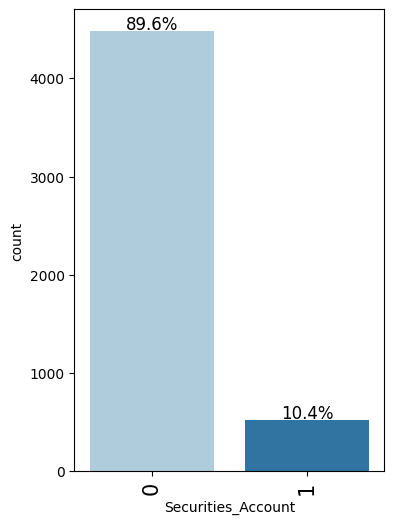

In [33]:
labeled_barplot(df,'Securities_Account',perc=True)

**Observation**

1. Only 10.4% people have securities account with the bank.

#### Observation on CD_Account



<ipython-input-20-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


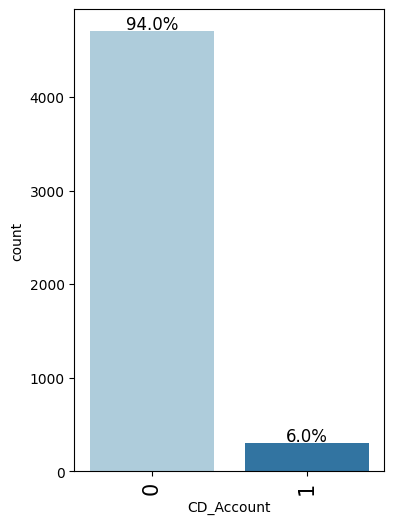

In [34]:
labeled_barplot(df,'CD_Account',perc=True)

**Observation**

1. only 6% have a CD_Account with the bank.

#### Observation on Online

<ipython-input-20-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


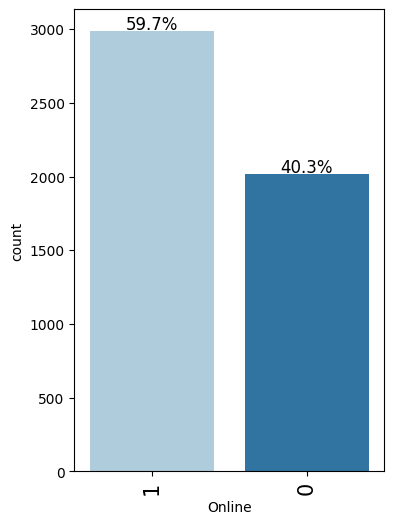

In [35]:
labeled_barplot(df,'Online',perc=True)

**Observation**

1. 59.7% customers use online banking.

#### Observation on Credit Card



<ipython-input-20-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


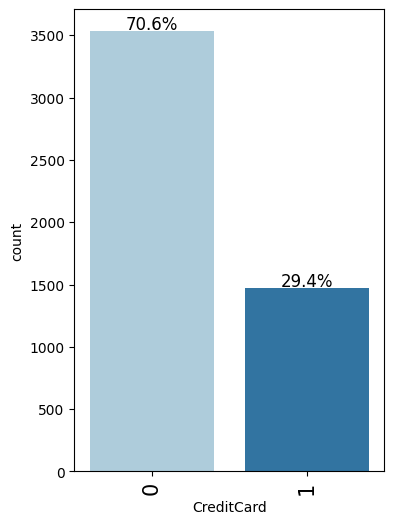

In [36]:
labeled_barplot(df,'CreditCard',perc=True)

**Observation**

1. 29.4% of people use credit card of other banks.

## Bivariate Analysis

#### Data Corelation using Heatmap

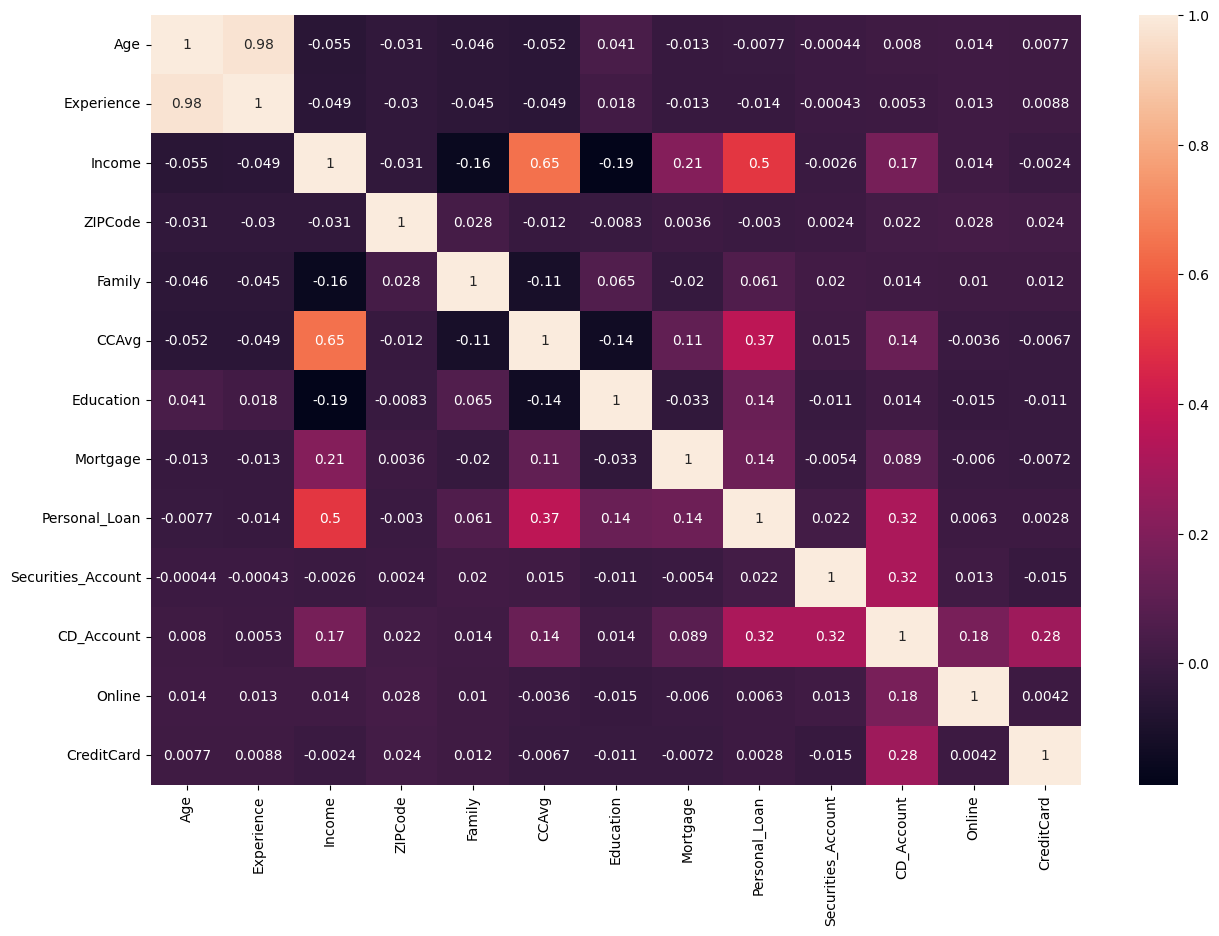

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

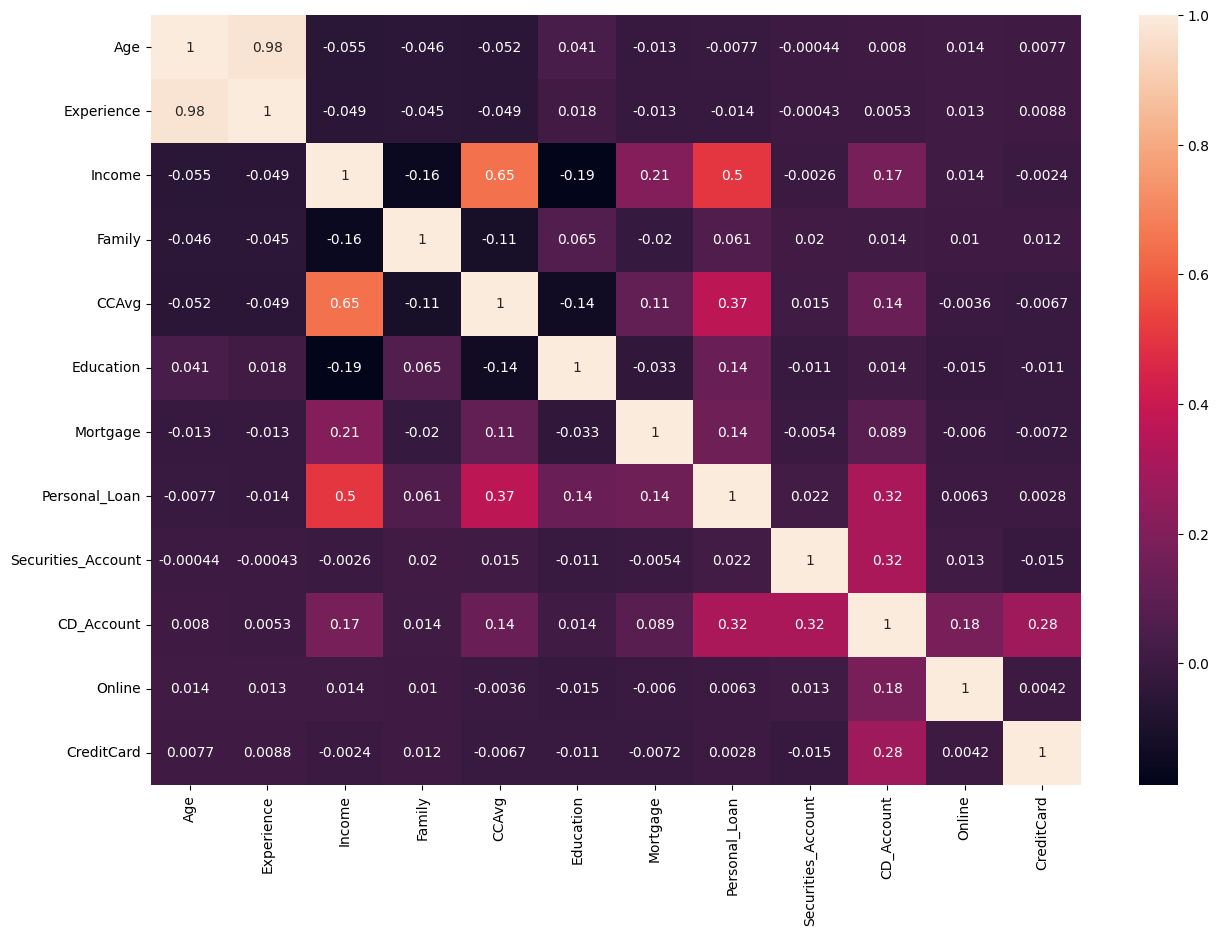

In [38]:
# Removing zipcode as it has no corelation with any other column

df.drop(columns=['ZIPCode'], inplace=True)
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Observation**

1. The correlation between Age and Experience is high with value as 0.98
2. The correlation between Income and CCAvg is low with value as -0.65
3. Other corelation values are pretty small.

**Note**

ZipCode column is removed s it does not have any corelation with any other column in the dataset.

#### Observation on Age with Personal Loan

<ipython-input-22-9b43b848bf73>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-22-9b43b848bf73>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


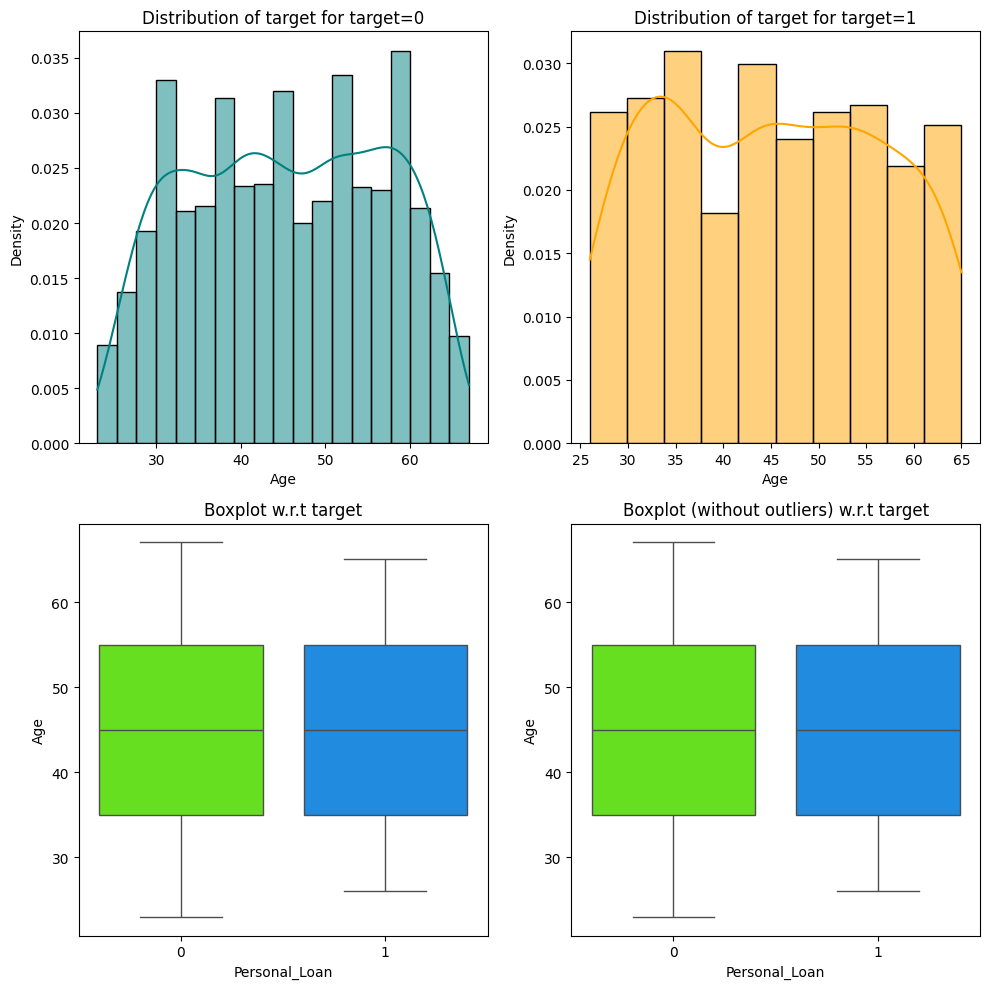

In [39]:
distribution_plot_wrt_target(df,'Age','Personal_Loan')

**Observation**

1. Median value of Age who have and dont have personal loan is around 45.
2. There is not much relation between Age and Personal Loan.

#### Observation of Experience with Person loan

<ipython-input-22-9b43b848bf73>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-22-9b43b848bf73>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


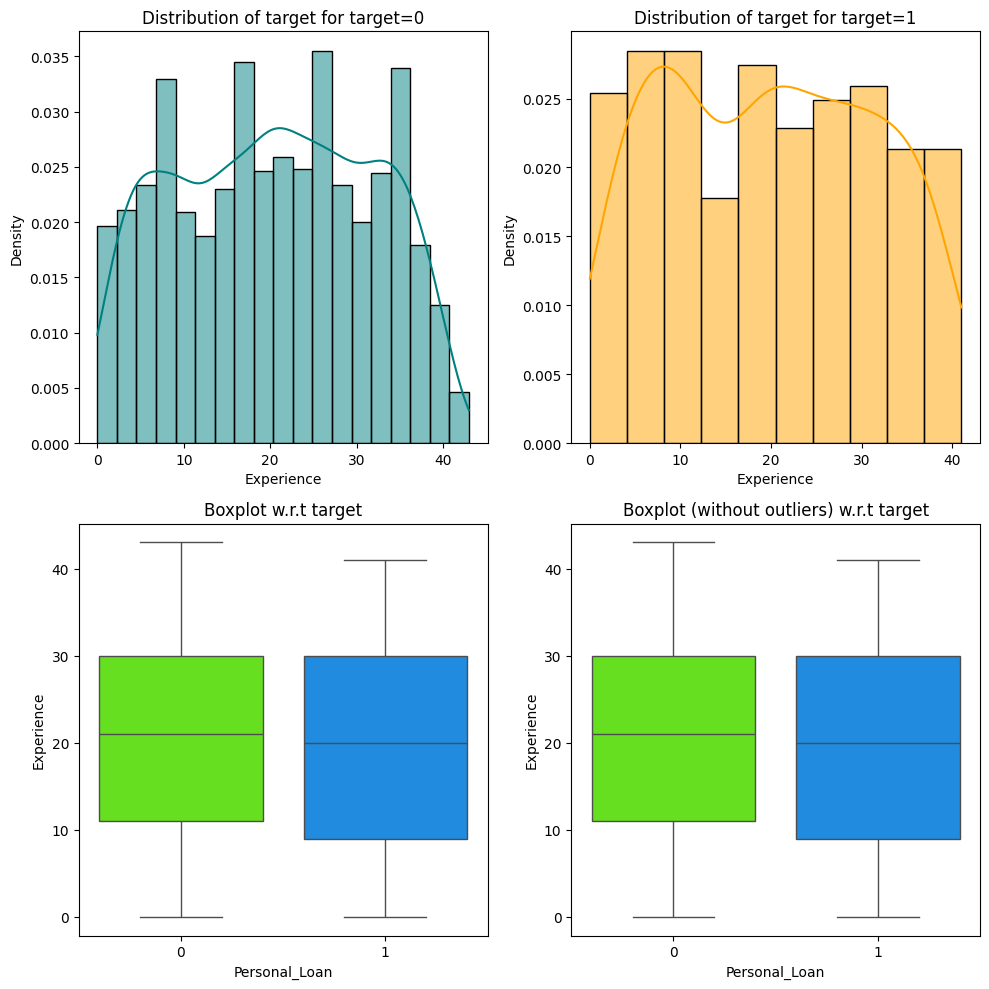

In [40]:
distribution_plot_wrt_target(df,'Experience','Personal_Loan')

**Observation**

1. Median value of Experience who have and dont have personal loan is around 20.
2. There is not much relation between Experience and Personal Loan.

#### Observation of Income with Personal Loan

<ipython-input-22-9b43b848bf73>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-22-9b43b848bf73>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


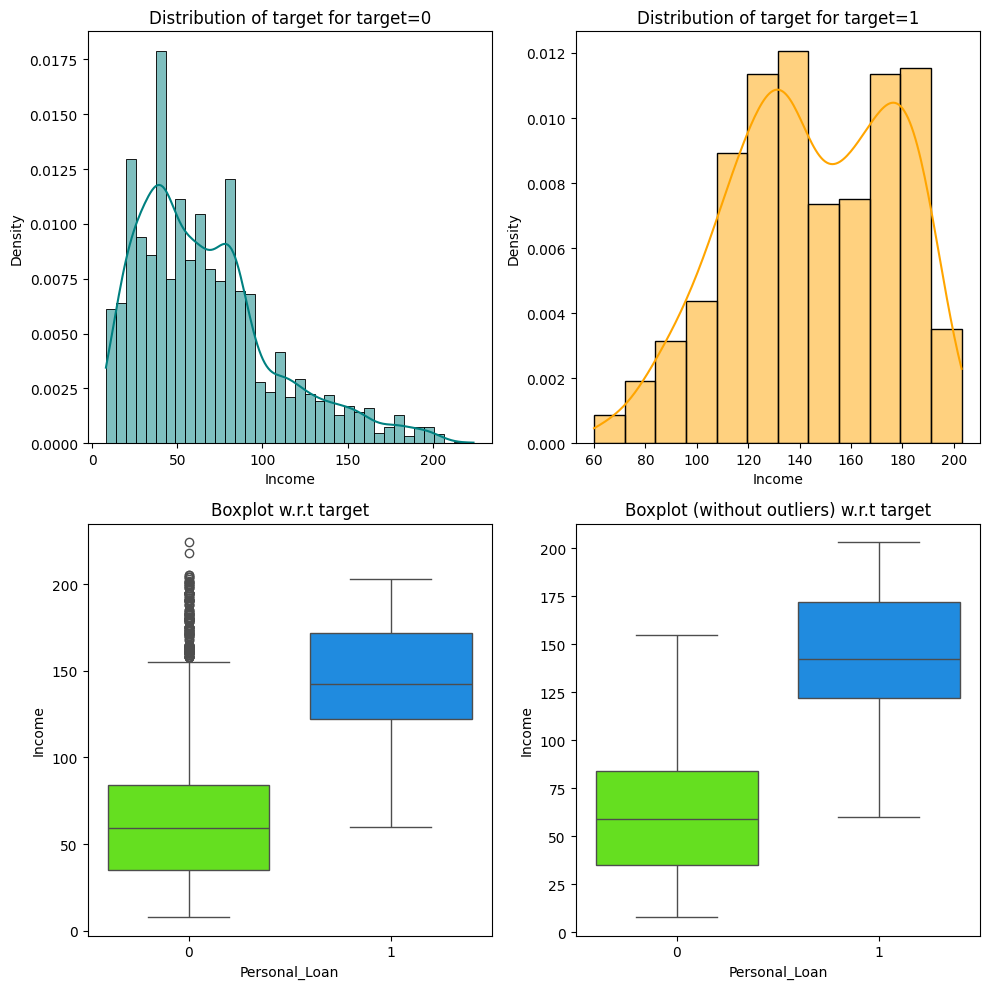

In [41]:
distribution_plot_wrt_target(df,'Income','Personal_Loan')

**Observation**

1. People with high income above 100k are more likely to take a personal loan.
2. Data of income with personal loan is right skewed

#### Observation on Family Size with Personal Loan

<ipython-input-22-9b43b848bf73>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-22-9b43b848bf73>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


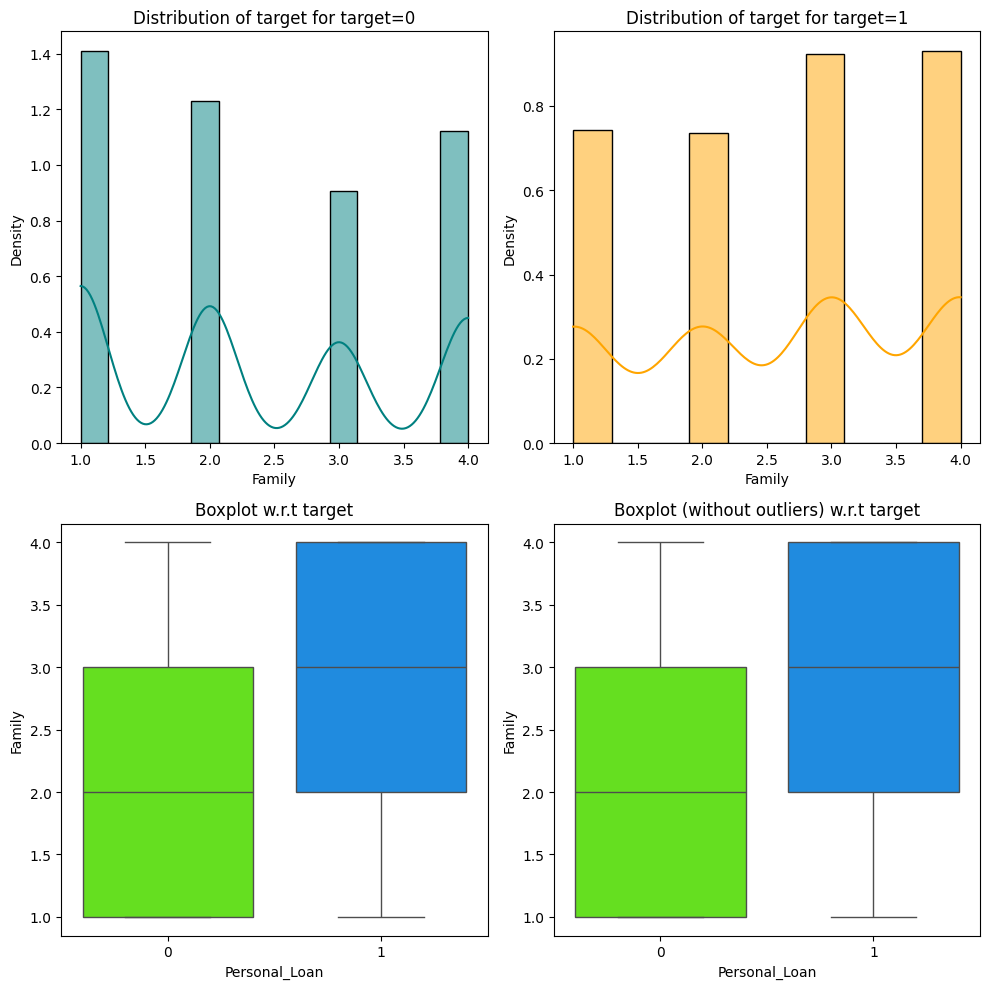

In [42]:
distribution_plot_wrt_target(df,'Family','Personal_Loan')

**Observation**

1. People with Faimily size of 2 or more than 2 are more likely to take a personal loan.

#### Observation of CCAvg with Personal Loan

<ipython-input-22-9b43b848bf73>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-22-9b43b848bf73>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


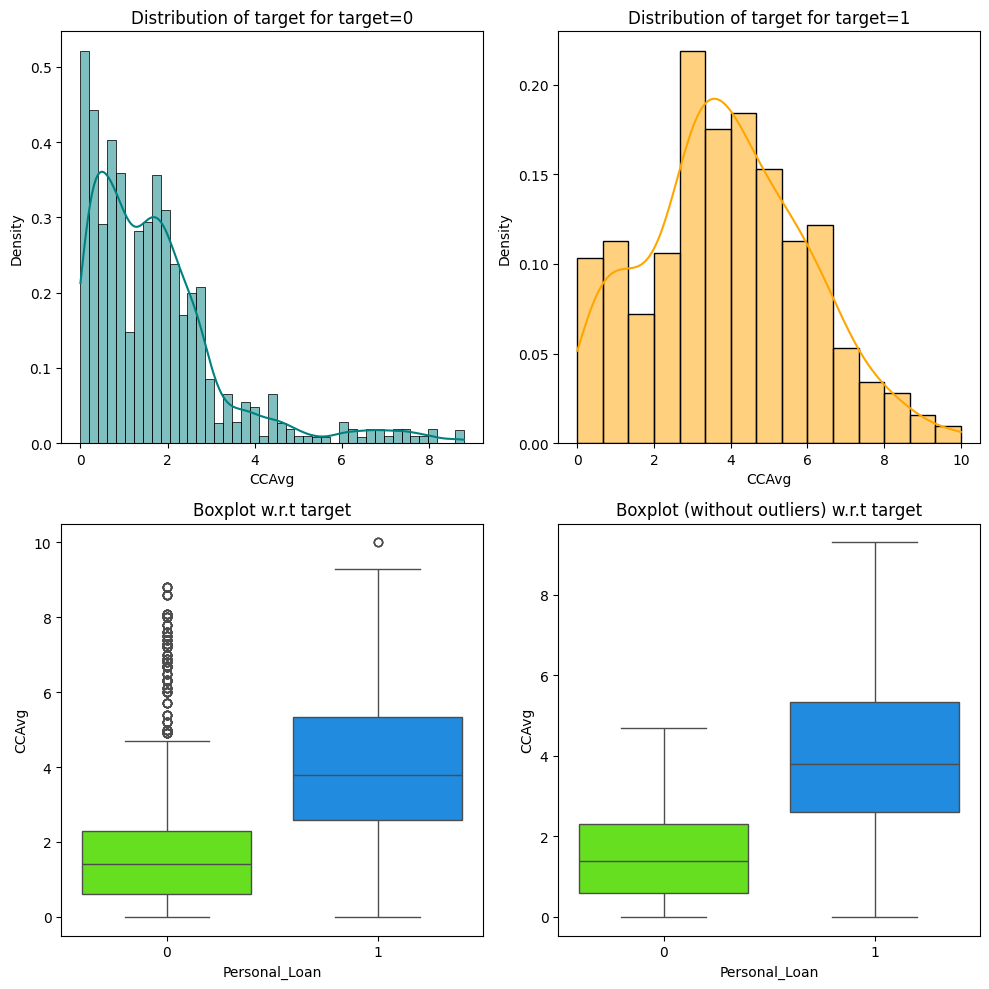

In [43]:
distribution_plot_wrt_target(df,'CCAvg','Personal_Loan')

**Observation**

1. People spending more than 2000 dollars are more likely to take a personal loan.
2. Median value of people spending more than 4000 dollars are more likely of taking a personal loan

#### Observation of Education with personal loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


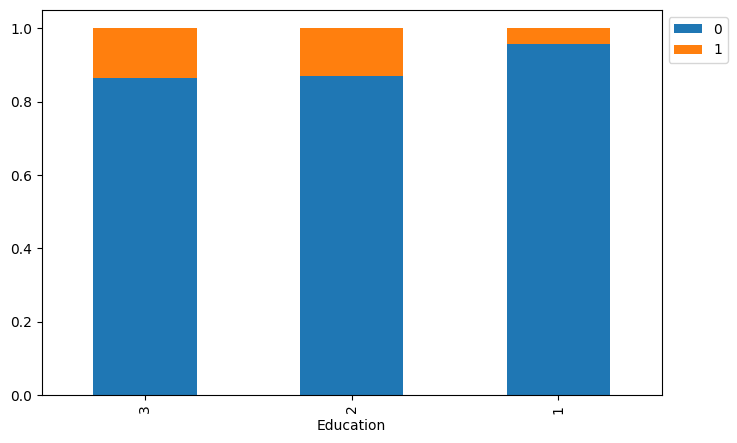

In [44]:
stacked_barplot(df,'Education','Personal_Loan')

**Observation**

1. People with Education level 2 and 3 are more prone to take up personal loan.

#### Observation of Mortgage with Personal Loan

<ipython-input-22-9b43b848bf73>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-22-9b43b848bf73>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


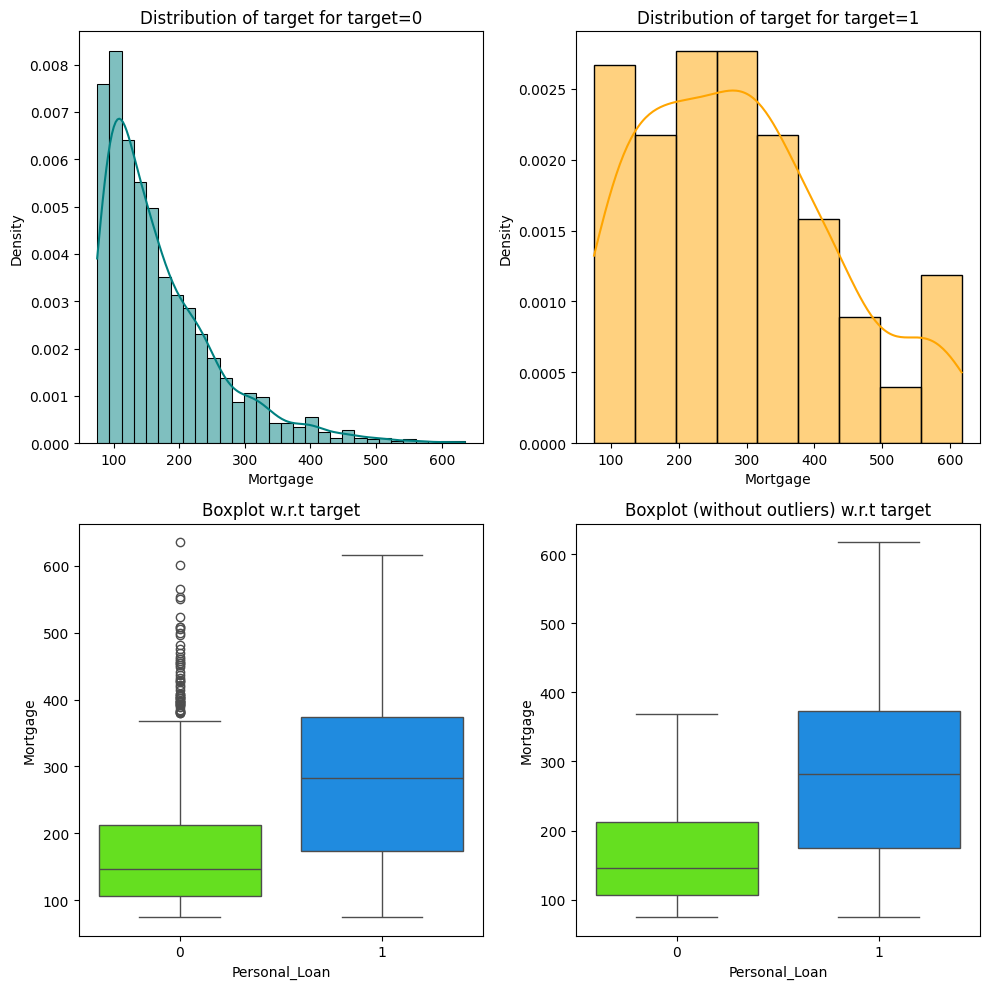

In [45]:
# Taking values of mortgage > 0 only as many values are 0
distribution_plot_wrt_target(df[df['Mortgage'] > 0],'Mortgage','Personal_Loan')

**Observation**

1. Data is highly right skewed.
2. If the mortgage amount is greater than 180K then people are more prune to take a personal loan.
3. Chances of taking a personal loan increases as mortgage value increases.

#### Observtion of Securitites Account with Personal Loan

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


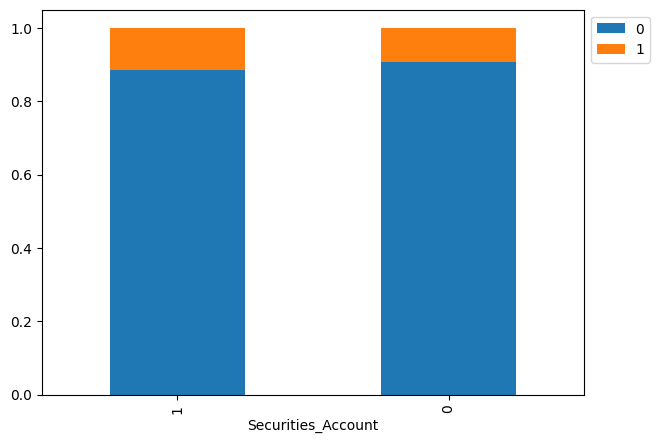

In [46]:
stacked_barplot(df,'Securities_Account','Personal_Loan')

**Observation**

1. People with Securities account are more likely to take a person loan

#### Observation of CD_Account with Personal Loan



Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


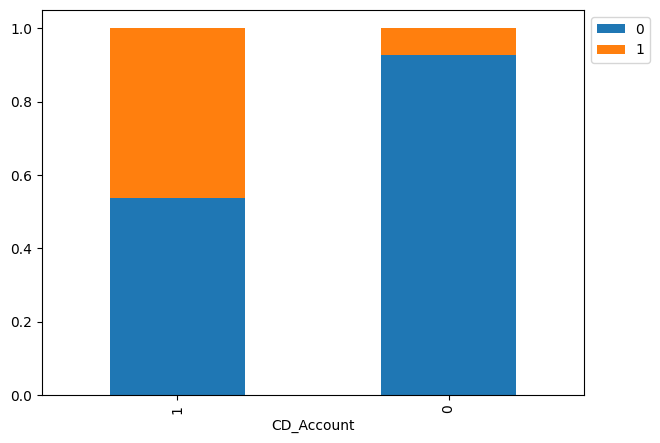

In [47]:
stacked_barplot(df,'CD_Account','Personal_Loan')

**Observation**

1. People with Customer with Deposit account are more likely to take a person loan

#### Observation of Online with Personal Loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


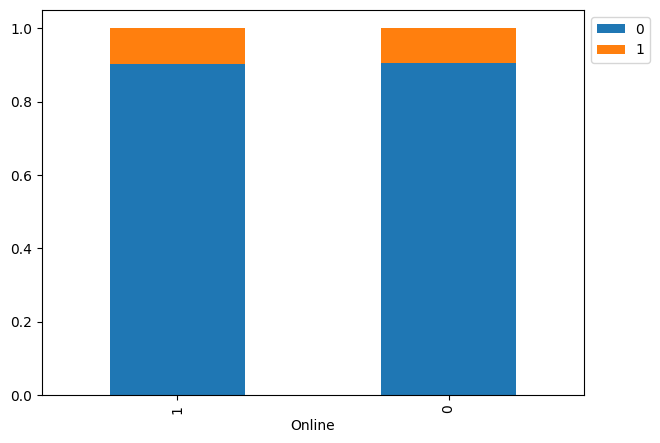

In [48]:
stacked_barplot(df,'Online','Personal_Loan')

**Observation**

1. Customers who use internet banking and not using internet banking are almost equally likely to take a person loan.

#### Observation of Credit Card with Personal Loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


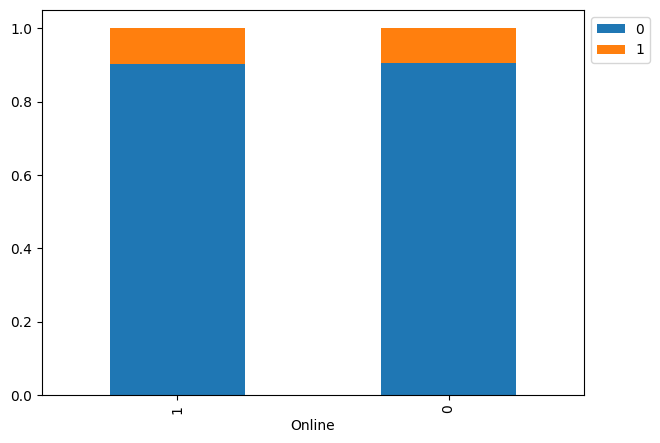

In [49]:
stacked_barplot(df,'Online','Personal_Loan')

**Observation**

1. Customers who use othe bank credit card and not using other bank credit card are almost equally likely to take a person loan.

# Data Preprocessing

#### Outlier Detection

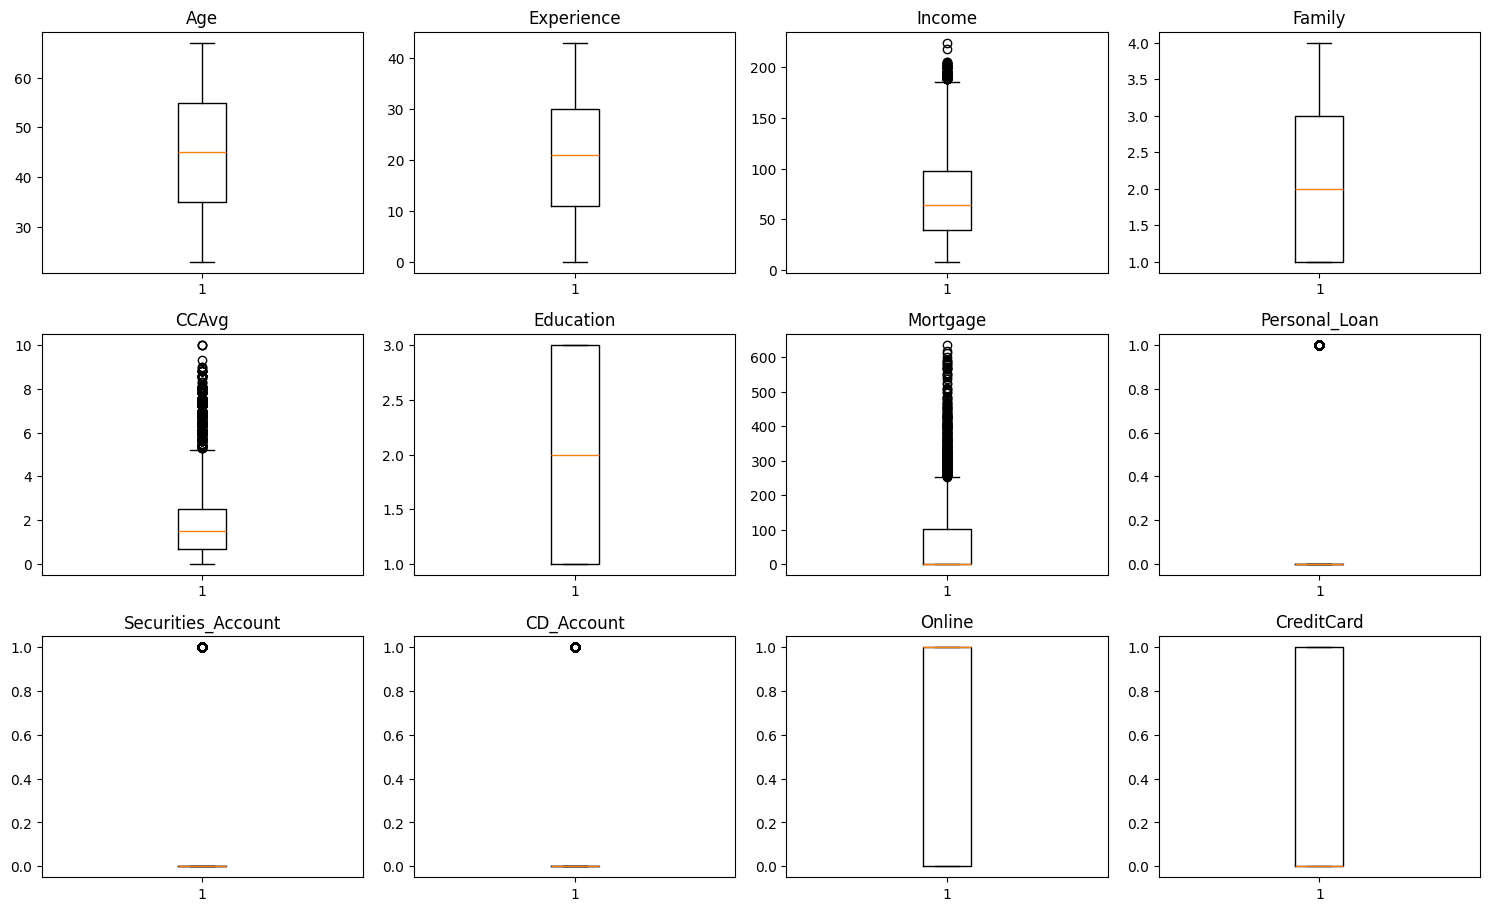

In [50]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation**

1. All the outliers in the data they are proper values

#### Data Preparation for Modeling

In [51]:
x = df.drop(["Personal_Loan"], axis=1)
y = df["Personal_Loan"]

# Splitting data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=1, stratify=y
)

In [52]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 11)
Shape of test set :  (1500, 11)
Percentage of classes in training set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


# Model Building

#### Model Evaluation Criterion



**Model can make wrong predictions as:**

1. Predicting a customer will take the loan but in reality it would not.(FP)
2. Predicting a customer will not take the loan but in reality it would.(FN)


**Which case is more important?**

1. If we Predict a customer will take the loan but in reality it would not.

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

#### Common Functions

In [53]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [54]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Decision Tree Default

In [55]:
dc_default = DecisionTreeClassifier(random_state=1)
dc_default.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

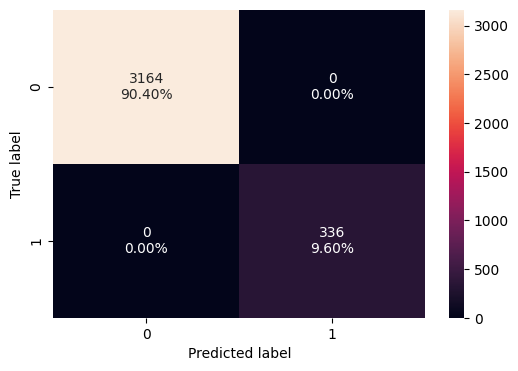

In [56]:
confusion_matrix_sklearn(dc_default, x_train, y_train)

In [57]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    dc_default, x_train, y_train
)
decision_tree_default_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

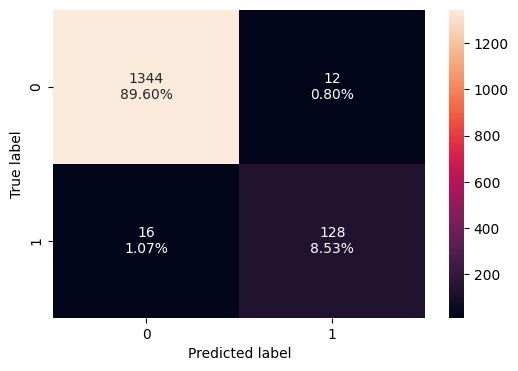

In [58]:
confusion_matrix_sklearn(dc_default, x_test, y_test)

In [59]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    dc_default, x_test, y_test
)
decision_tree_default_perf_test

Accuracy    Recall  Precision        F1
0  0.981333  0.888889   0.914286  0.901408

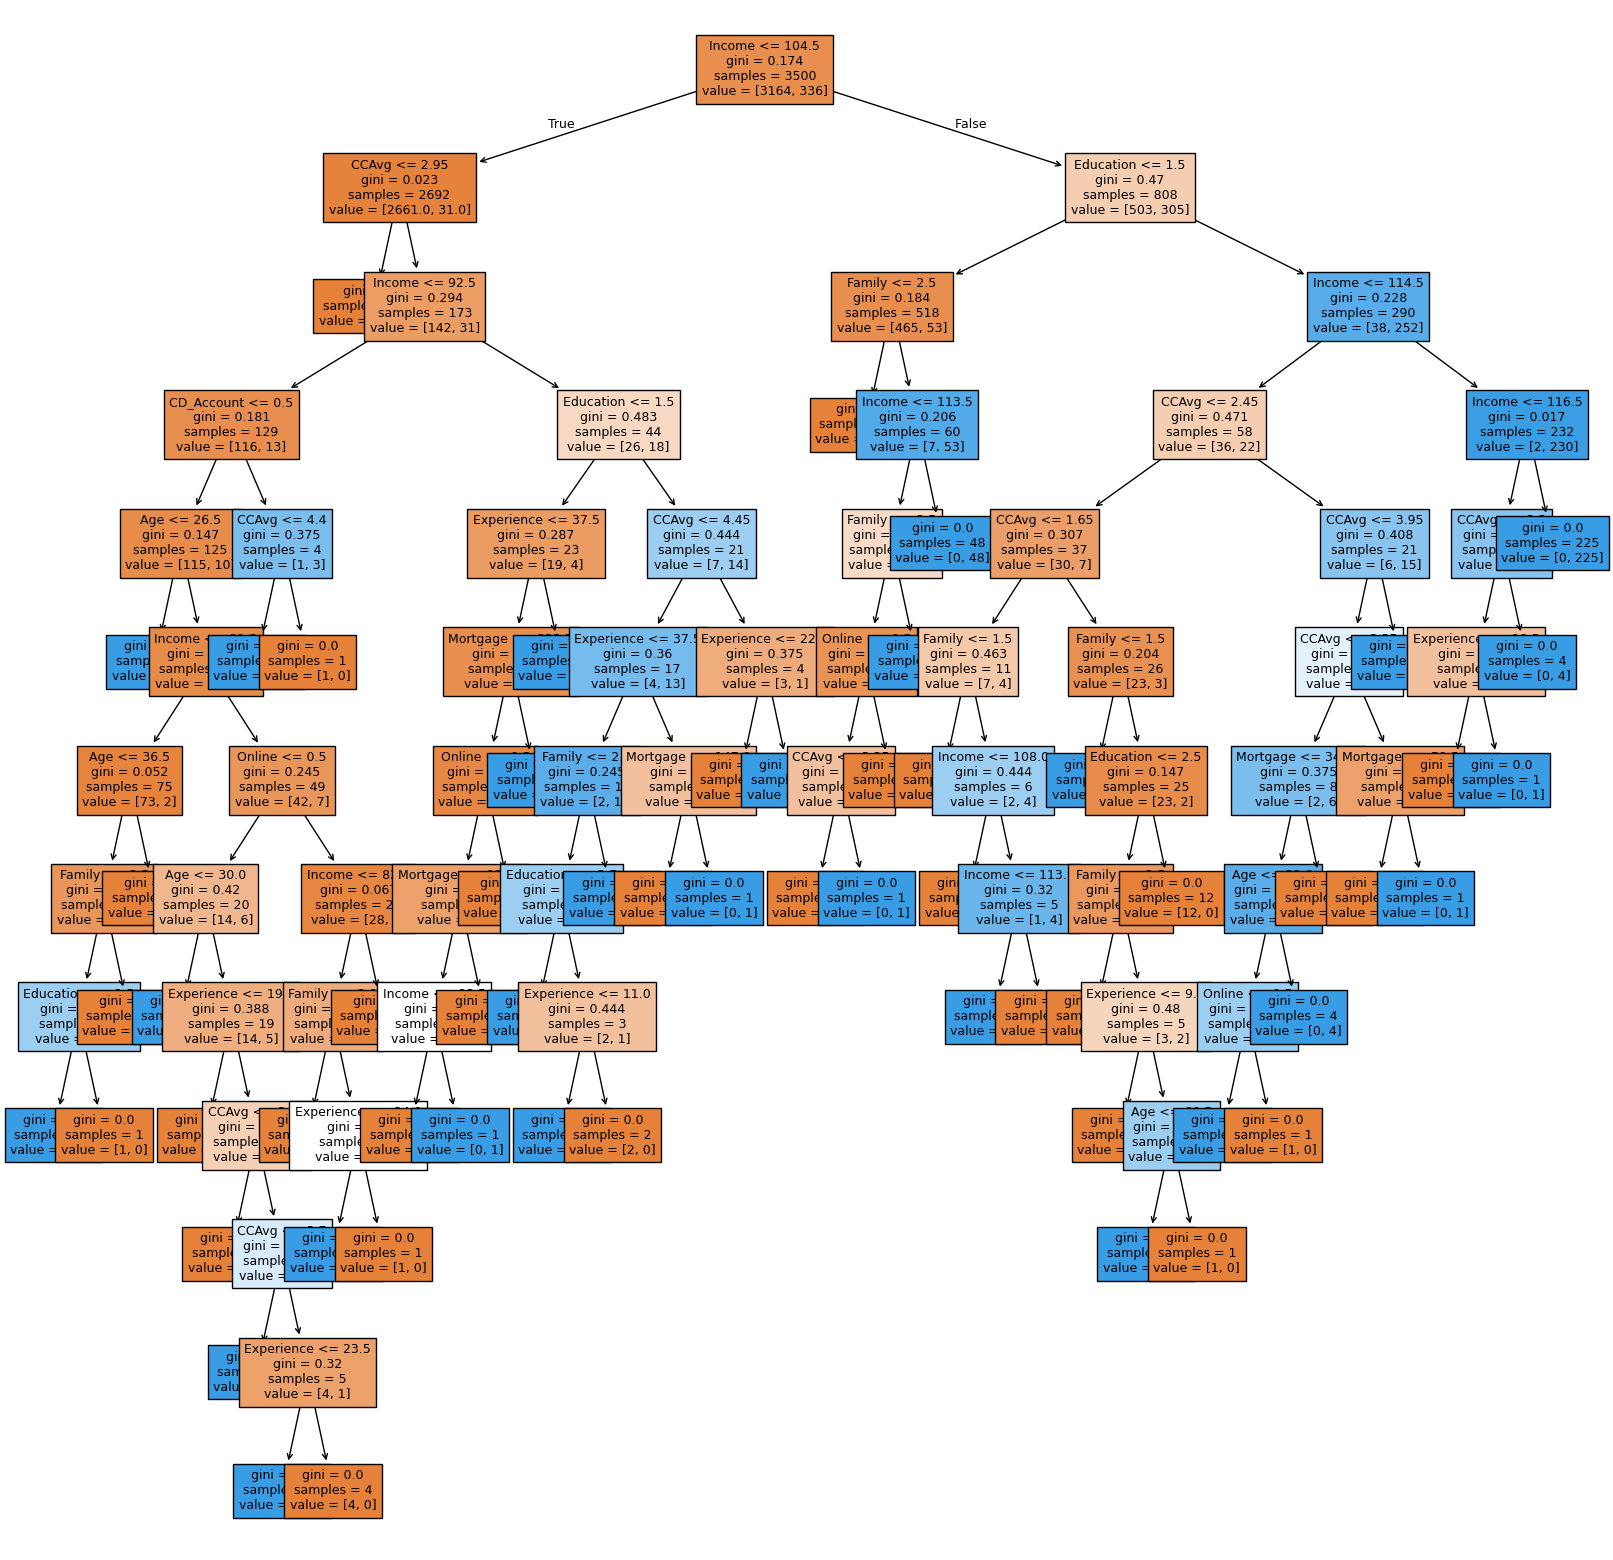

In [60]:
#Visualizing the Decision Tree

# list of feature names in X_train
feature_names = list(x_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dc_default,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

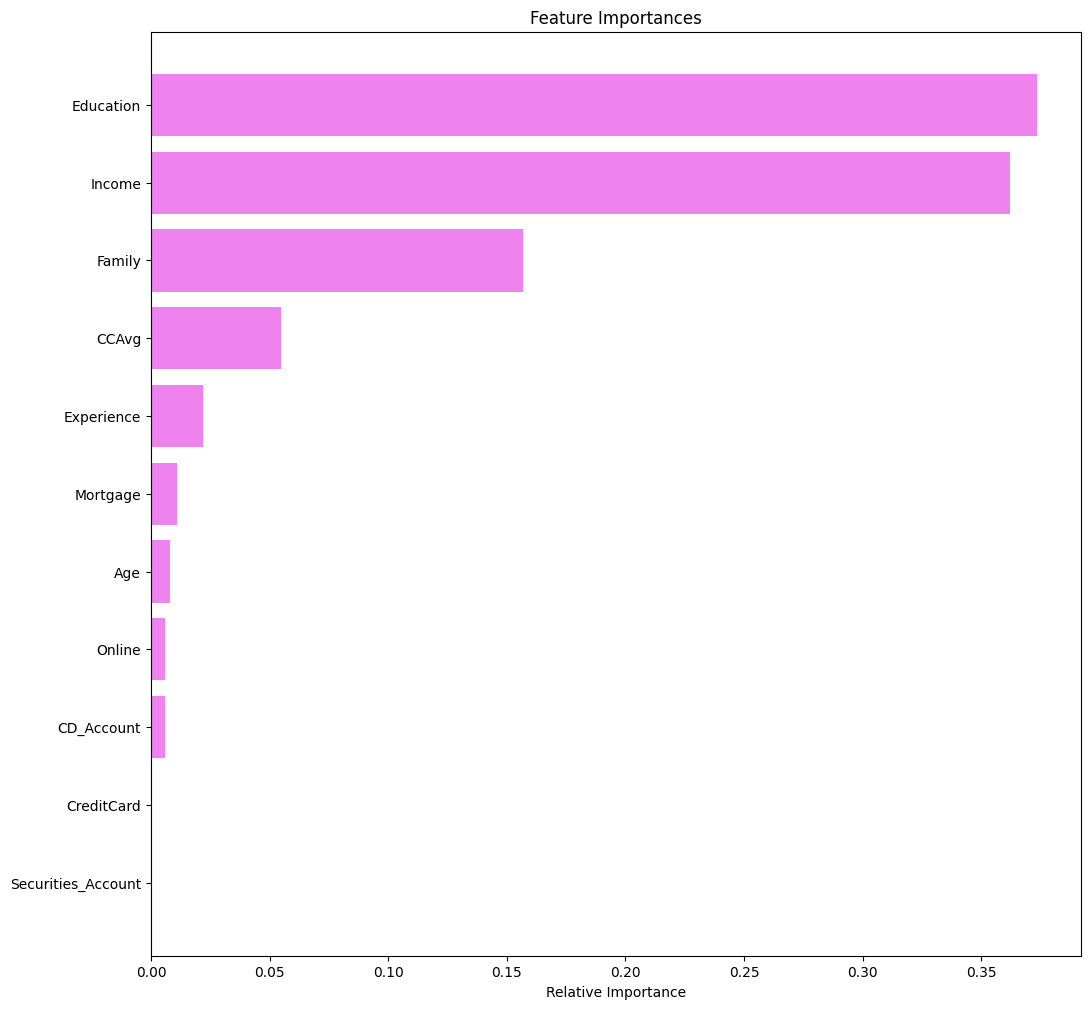

In [61]:
importances = dc_default.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

1. The recall score in the training dataset is 1 but in testing dataset it is 0.89.

2. The model is overfitted which is indicated by the difference in recall.

3. Top 5 important features are Education, Income, Family, CCAvg, Experience.

#### Decision Tree with Class Weights Balanced

In [62]:
dc_weight = DecisionTreeClassifier(random_state=1, class_weight="balanced")
dc_weight.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

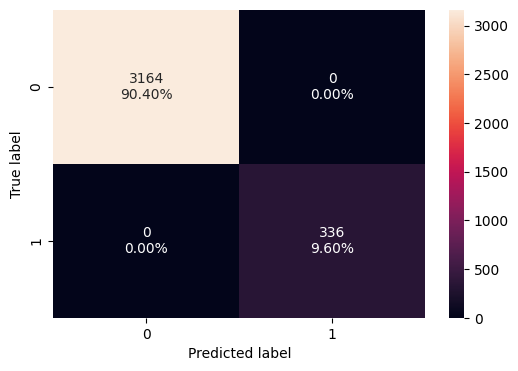

In [63]:
confusion_matrix_sklearn(dc_weight, x_train, y_train)

In [64]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dc_weight, x_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

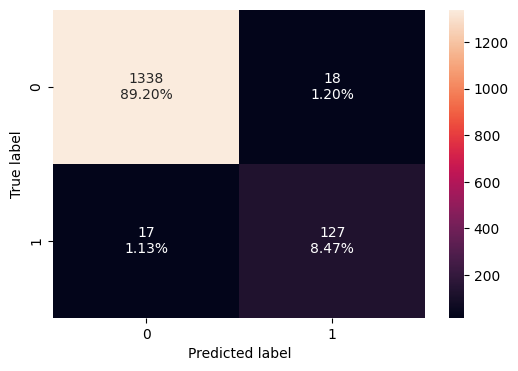

In [65]:
confusion_matrix_sklearn(dc_weight, x_test, y_test)

In [66]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dc_weight, x_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.976667  0.881944   0.875862  0.878893

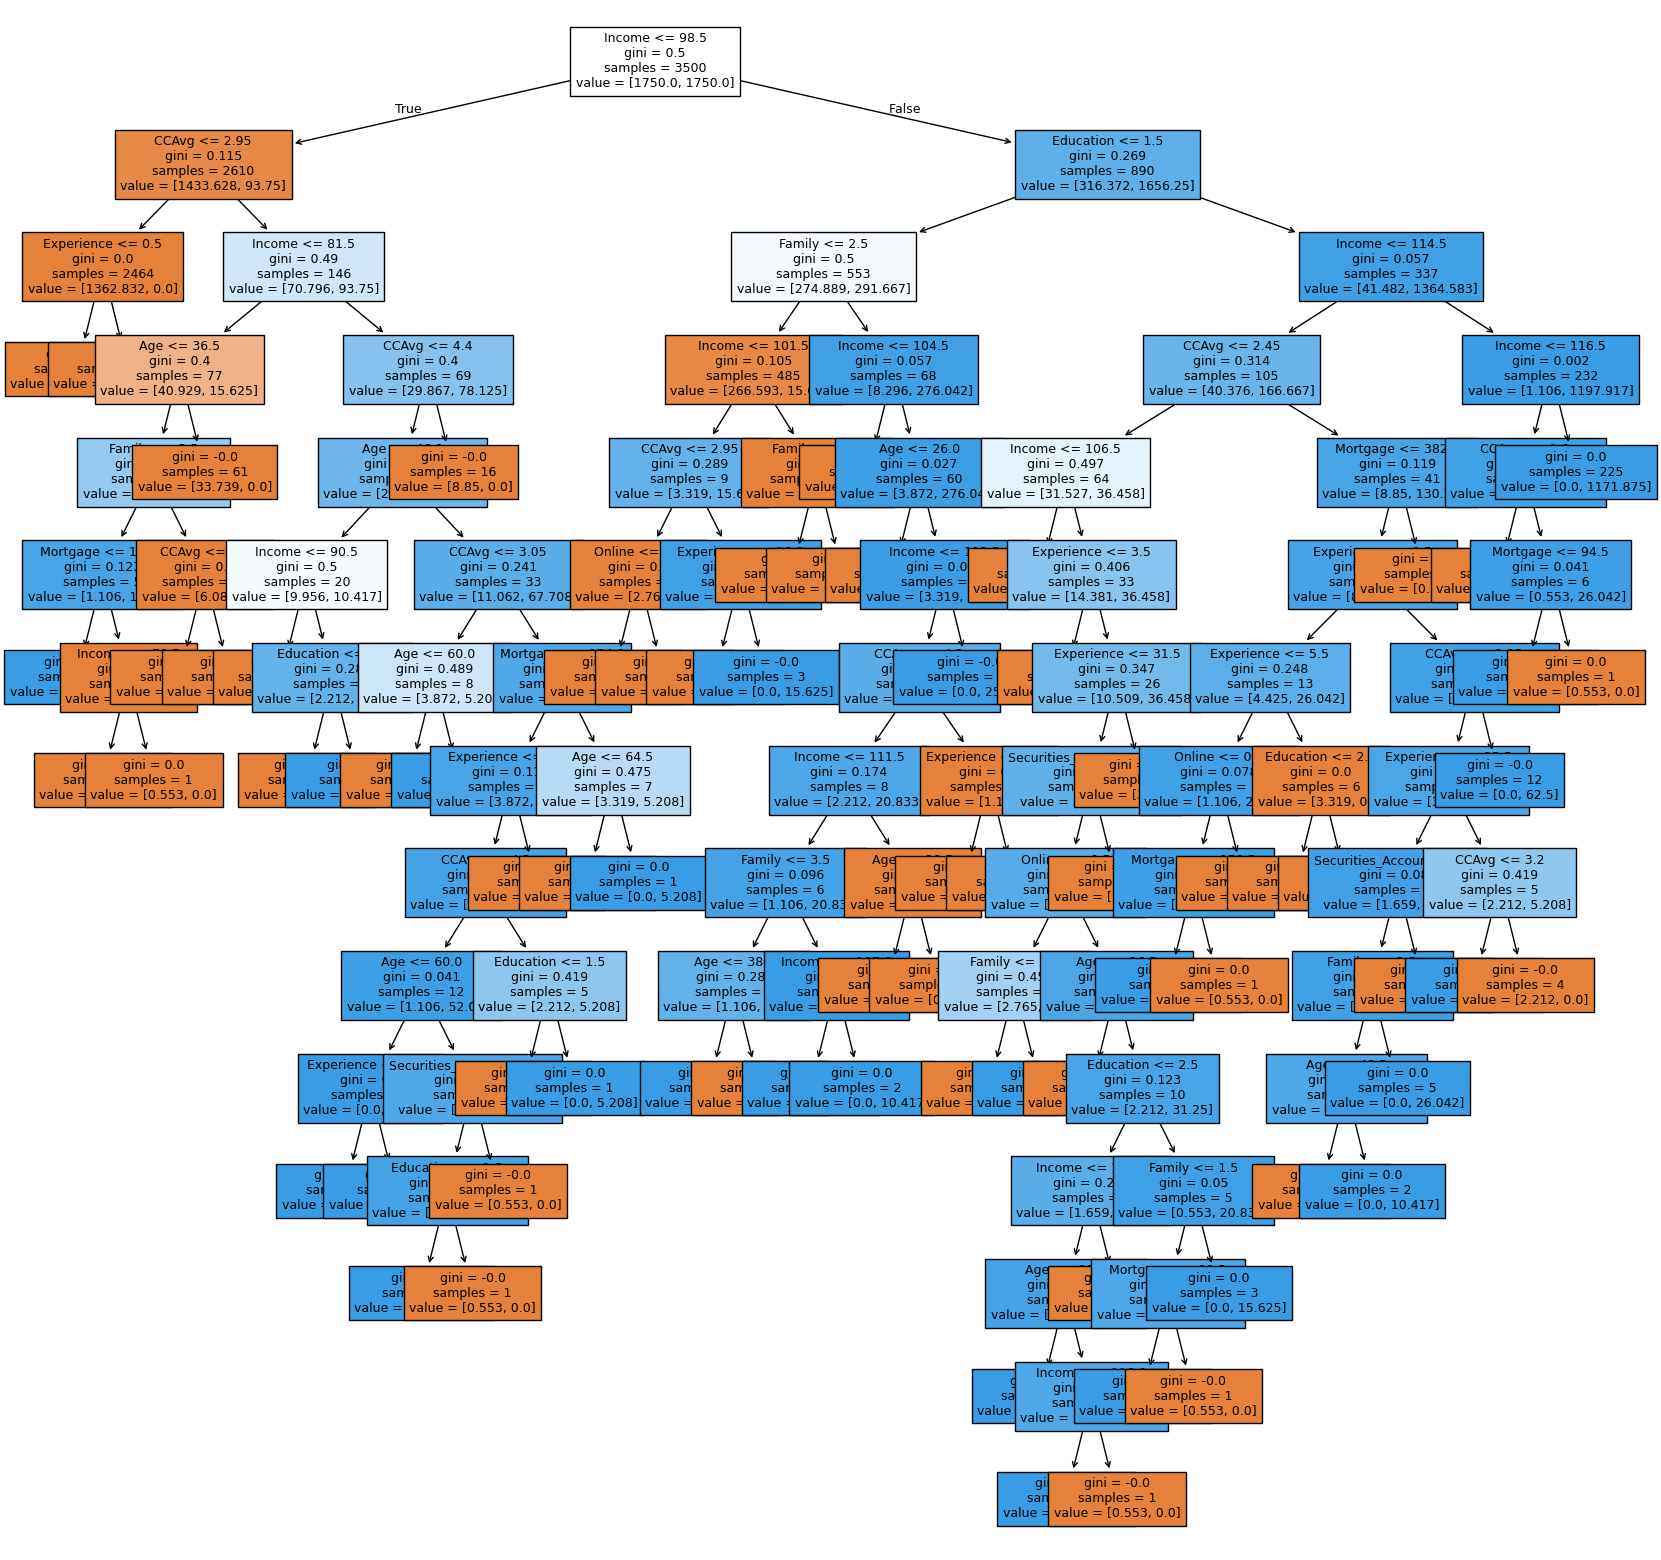

In [67]:
#Visualizing the Decision Tree

# list of feature names in X_train
feature_names = list(x_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dc_weight,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

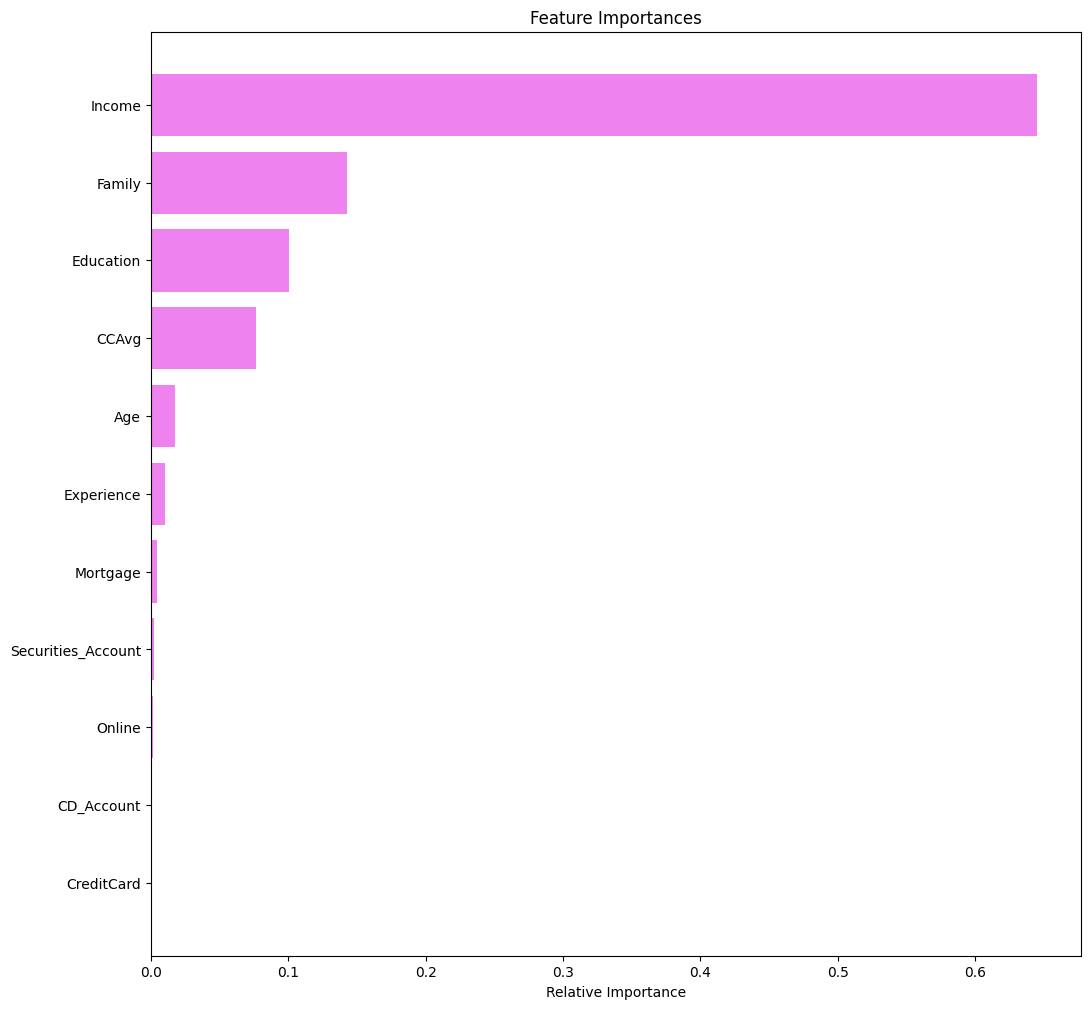

In [68]:
importances = dc_weight.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**

1. There is a disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

2. Top 5 Important Columns are Income, Family, Education, CCAvg, Age.

#### Decision Tree with Pre-Pruning

In [69]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(1, 11, 2)
max_leaf_nodes_values = [5, 10, 15, 20, 25, 30]
min_samples_split_values = [5, 10, 15, 20, 25, 30]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=1
            )

            # Fit the model to the training data
            estimator.fit(x_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(x_train)
            y_test_pred = estimator.predict(x_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 3
Max leaf nodes: 5
Min samples split: 5
Best test recall score: 0.9861111111111112


In [70]:
# creating an instance of the best model
dc_prepruned = best_estimator

# fitting the best model to the training data
dc_prepruned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(3),
                       max_leaf_nodes=5, min_samples_split=5, random_state=1)

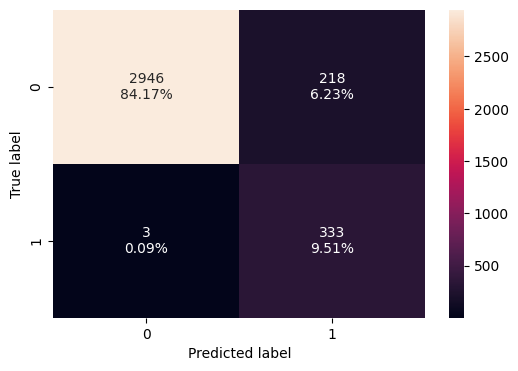

In [71]:
confusion_matrix_sklearn(dc_prepruned, x_train, y_train)

In [72]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    dc_prepruned, x_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.936857  0.991071   0.604356  0.750846

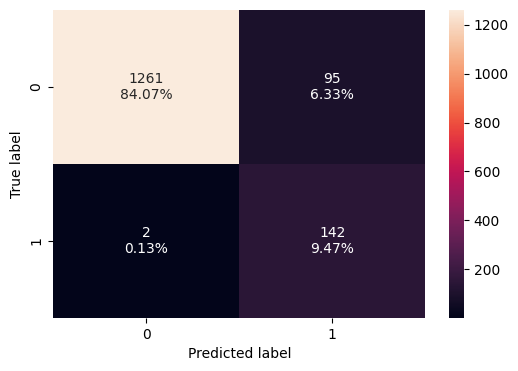

In [73]:
confusion_matrix_sklearn(dc_prepruned, x_test, y_test)

In [74]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    dc_prepruned, x_test, y_test
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.935333  0.986111   0.599156  0.745407

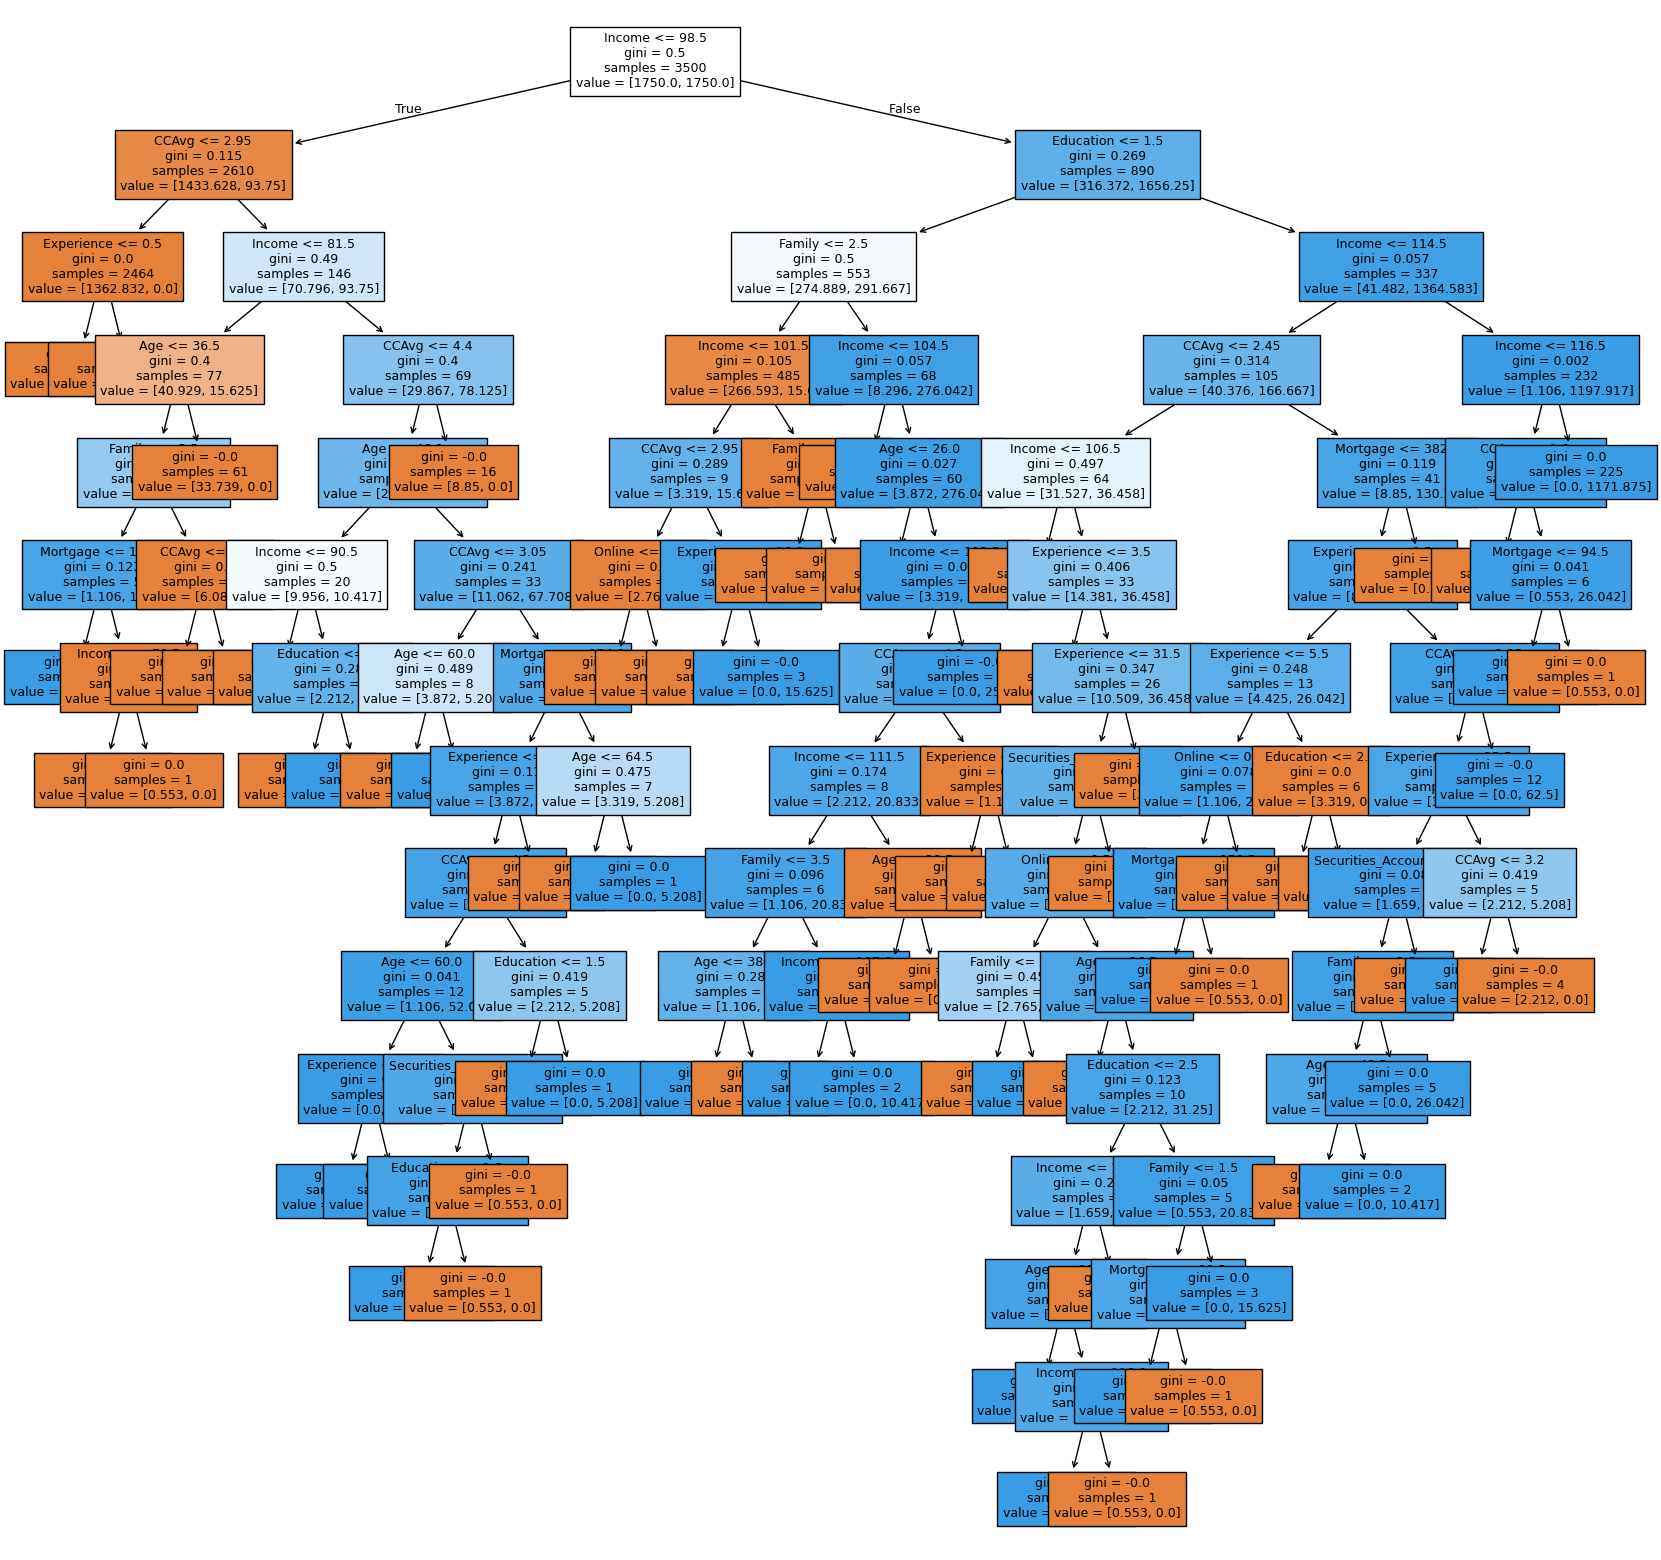

In [75]:
#Visualizing the Decision Tree

# list of feature names in X_train
feature_names = list(x_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dc_weight,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

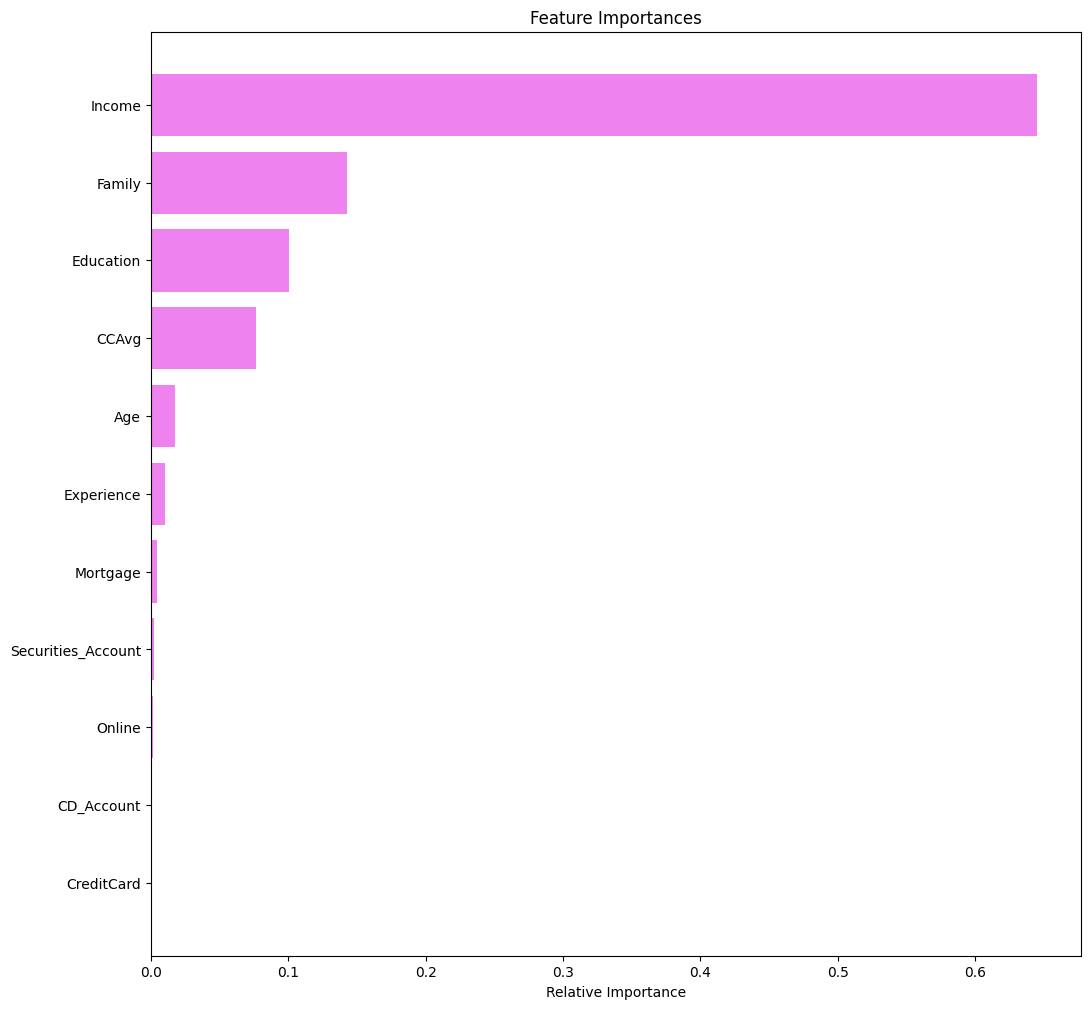

In [76]:
importances = dc_weight.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**

1. Recall Value as per the pre pruned model is .986.

2. Top 5 Important Columns are Income, Family, Education, CCAvg, Age.

#### Decision Tree Post Pruning

In [77]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [78]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -1.116539e-16
1   6.316060e-19 -1.110223e-16
2   1.543926e-18 -1.094784e-16
3   1.543926e-18 -1.079345e-16
4   1.929907e-18 -1.060045e-16
5   1.982541e-18 -1.040220e-16
6   4.421242e-18 -9.960076e-17
7   4.561599e-18 -9.503916e-17
8   5.286776e-18 -8.975238e-17
9   1.920784e-16  1.023260e-16
10  3.026095e-16  4.049355e-16
11  1.500600e-04  3.001200e-04
12  1.539409e-04  6.080018e-04
13  2.063217e-04  1.226967e-03
14  2.105094e-04  1.858495e-03
15  2.812661e-04  2.702293e-03
16  3.001200e-04  3.302533e-03
17  3.022975e-04  4.209426e-03
18  3.031773e-04  4.815780e-03
19  3.052503e-04  5.121031e-03
20  3.953870e-04  6.702579e-03
21  4.087378e-04  7.928792e-03
22  4.844595e-04  9.382171e-03
23  5.903188e-04  9.972490e-03
24  6.462184e-04  1.126493e-02
25  6.652041e-04  1.326054e-02
26  6.876531e-04  1.394819e-02
27  8.062318e-04  1.556066e-02
28  8.743062e-04  1.730927e-02
29  1.042753e-03  1.835202e-02
30  1.229543e-03  1.958156e-02
31  1.231586e-03  2.081315e-02
32  1.258879e-03  2.207203e-02
33  1.493932e-03  2.505989e-02
34  2.223534e-03  2.728343e-02
35  2.420717e-03  2.970414e-02
36  2.882771e-03  3.258692e-02
37  3.647901e-03  3.623482e-02
38  3.767998e-03  4.000281e-02
39  3.988612e-03  4.798004e-02
40  4.240658e-03  5.222070e-02
41  6.870112e-03  5.909081e-02
42  2.723401e-02  8.632482e-02
43  5.787394e-02  2.020727e-01
44  2.979273e-01  5.000000e-01

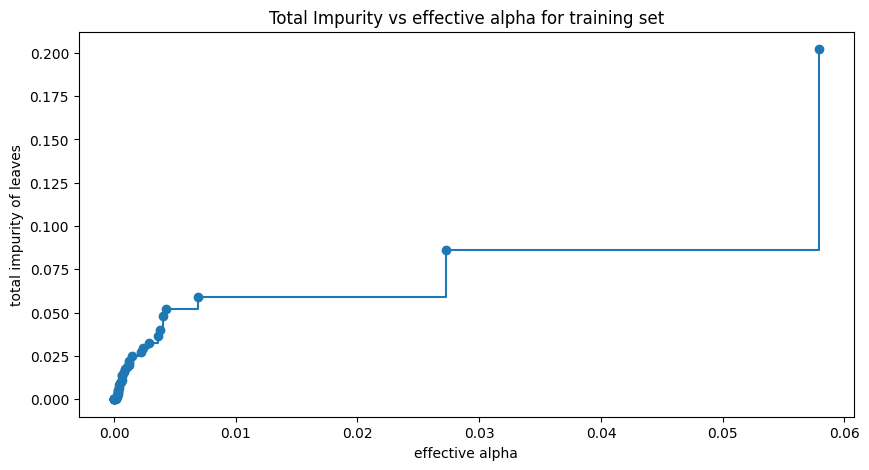

In [79]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [80]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.297927299368945


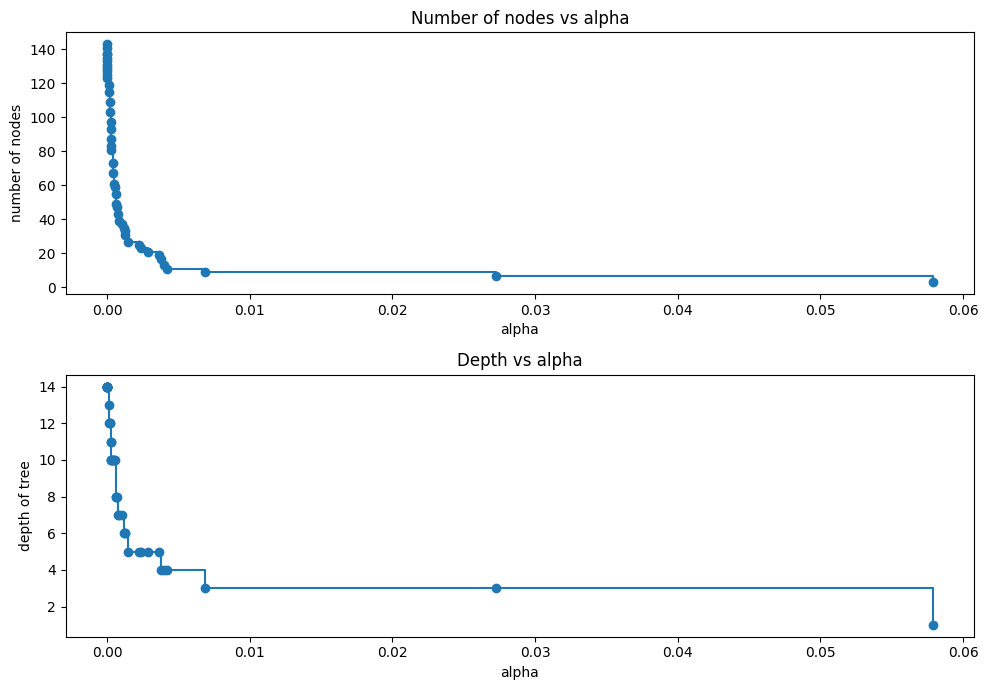

In [81]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [82]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [83]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [84]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

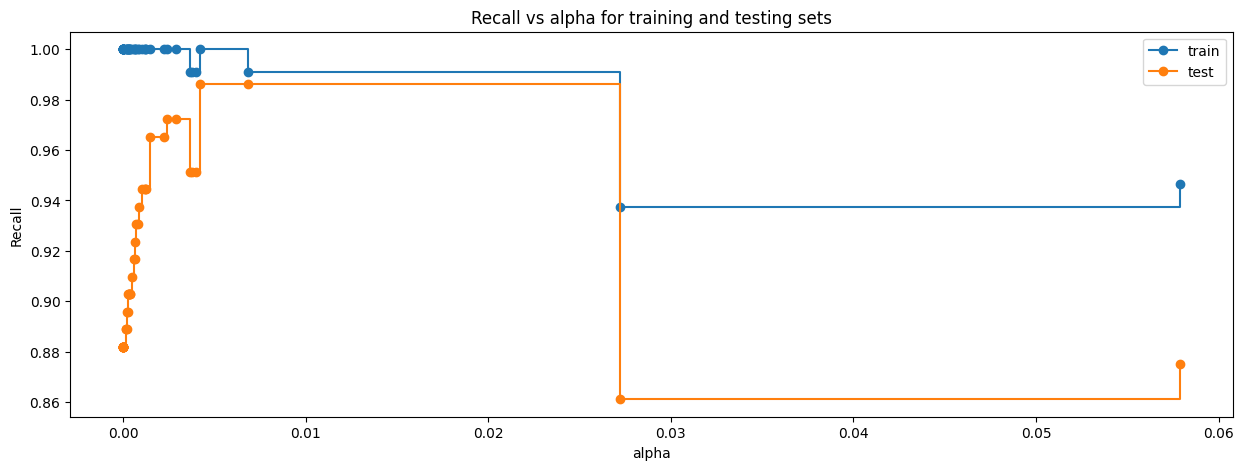

In [85]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [86]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0042406581609000515),
                       class_weight='balanced', random_state=1)


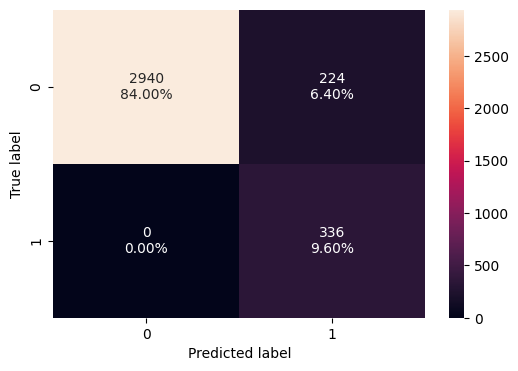

In [87]:
dc_postpruning = best_model
confusion_matrix_sklearn(dc_postpruning, x_train, y_train)

In [88]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    dc_postpruning, x_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision    F1
0     0.936     1.0        0.6  0.75

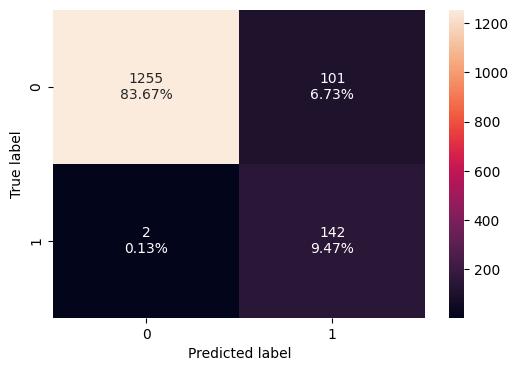

In [89]:
confusion_matrix_sklearn(dc_postpruning, x_test, y_test)

In [90]:
decision_tree_post_test = model_performance_classification_sklearn(
    dc_postpruning, x_test, y_test
)
decision_tree_post_test

Accuracy    Recall  Precision       F1
0  0.931333  0.986111   0.584362  0.73385

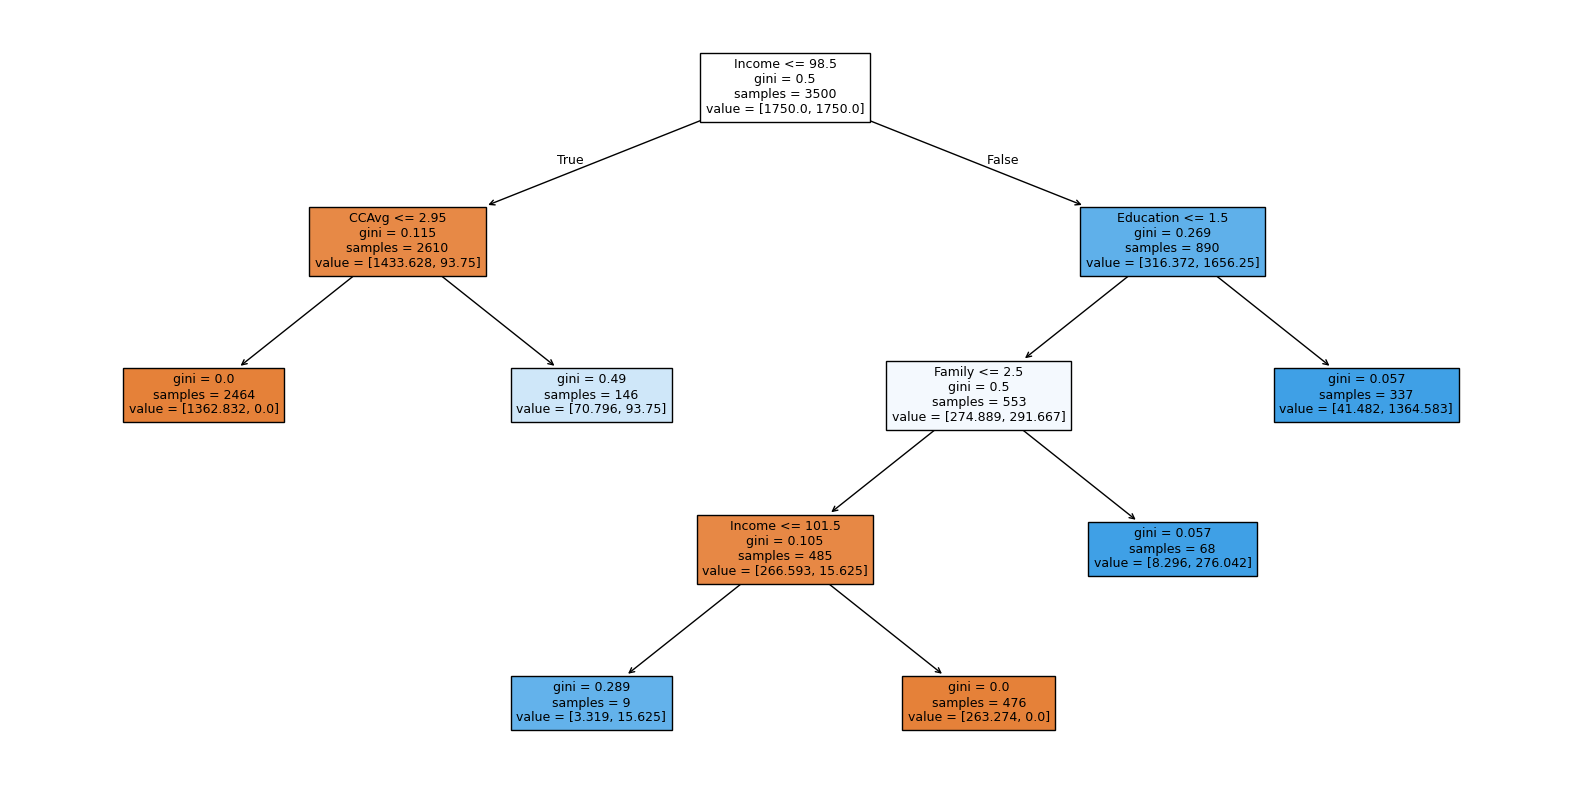

In [91]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    dc_postpruning,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [92]:
importances = dc_postpruning.feature_importances_
indices = np.argsort(importances)

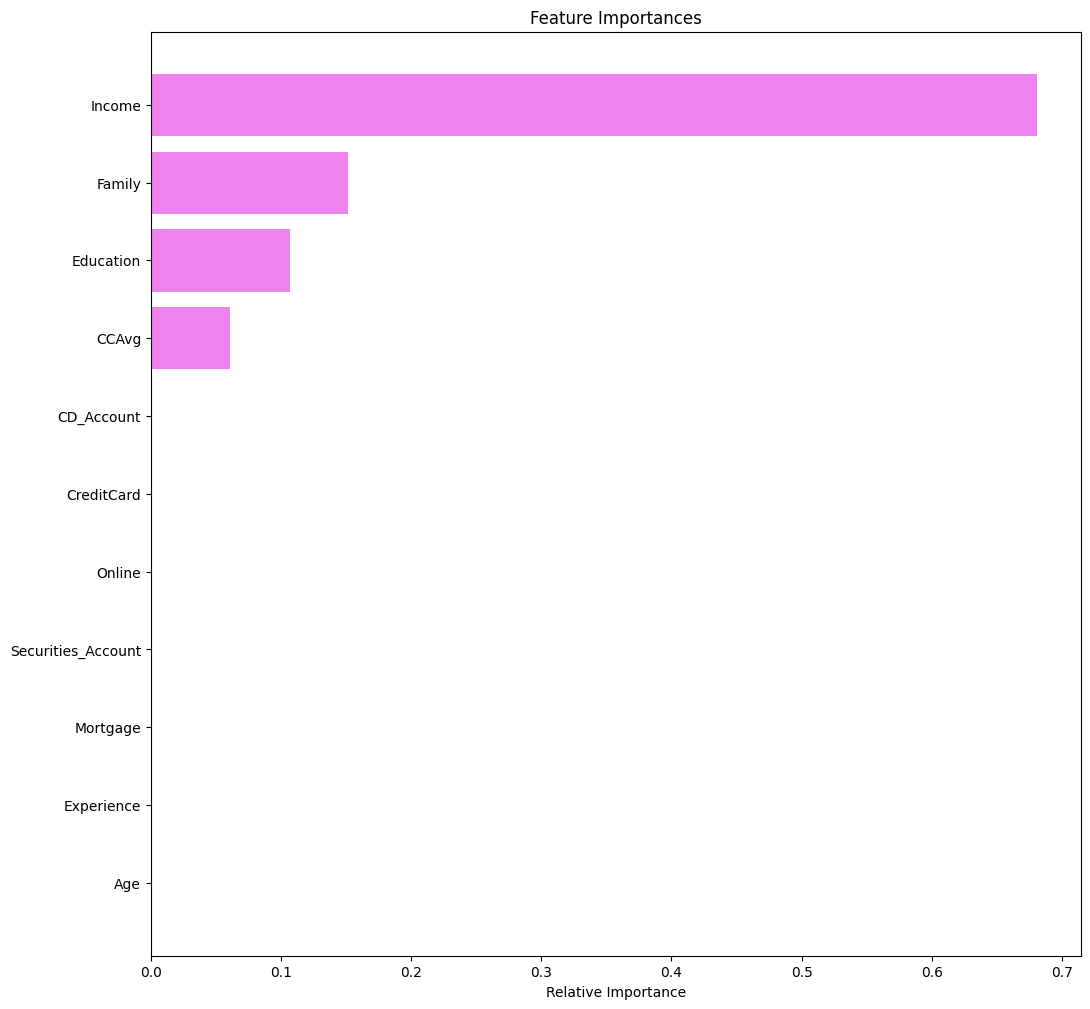

In [93]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**

1. Recall value has improved to 98.6%
2. Complexity of the post pruned decision tree has come down drastically.
3. Important features are Income, Family, Education and CCAvg.

# Comparison of all models and Final Model Selection

In [94]:
models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                               1.0                              1.0   
Recall                                 1.0                              1.0   
Precision                              1.0                              1.0   
F1                                     1.0                              1.0   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.936857                         0.936  
Recall                        0.991071                         1.000  
Precision                     0.604356                         0.600  
F1                            0.750846                         0.750

In [95]:
models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                          0.981333                         0.976667   
Recall                            0.888889                         0.881944   
Precision                         0.914286                         0.875862   
F1                                0.901408                         0.878893   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.935333                      0.931333  
Recall                        0.986111                      0.986111  
Precision                     0.599156                      0.584362  
F1                            0.745407                      0.733850

**Model Selection**

* Decision tree models with pre pruning and post-pruning same recall score for test datasets.
* But, we will be choosing the pre pruning method as the difference in recall score between the training set and Test set is lesser in pre pruning decision tree. Therefore the best method is **pre-pruning decision tree**

# Conclusions and Recommendations

- The model built can be used to predict if a customer is going to take personal loan or not and can do that with 98%correctly.

- Top 3 Important Features in predictingwhether a customer will accept personal loan or not were Income, Family, Education.

- Marketing Team can target customers who have Income of greater than 100K as potentil customers for accepting a personal loan.

- Marketing Team can also target customers who have family size of 2 or greater than 2 for accepting a personal loan.

- Marketing Team can also target customers who are graduate and Advanced/Professional as they have higher changes of accepting personal loan.